<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Logo_DuocUC.svg/2560px-Logo_DuocUC.svg.png' width=50%, height=20%>

# MINERÍA DE DATOS
## Nombre: Joey Jerez Sepúlveda
## Docente: Jorge Alberto Castro
## Sección: BIY7121-001D

# FASE 1 : COMPRENDER EL NEGOCIO

# 1.1 Contexto del negocio

StarCraft II es un juego de estrategia en tiempo real (RTS) desarrollado por Blizzard Entertainment. Lanzado en 2010, es la secuela
del icónico StarCraft original. El juego se ambienta en un futuro distante, donde tres facciones, los humanos terran, los enjambres
zerg y los misteriosos protoss, luchan por el control del sector Koprulu.
Los jugadores pueden elegir una de las tres razas, cada una con habilidades únicas y estrategias distintas. StarCraft II presenta una
campaña envolvente con una narrativa rica y desafiantes misiones para cada raza. Además, destaca en el ámbito multijugador,
donde jugadores de todo el mundo compiten en emocionantes batallas.
El juego ha alcanzado un estatus destacado en los deportes electrónicos (eSports), con una comunidad activa y competiciones de
alto nivel. La gestión de recursos, la toma de decisiones estratégicas y la velocidad de ejecución son fundamentales en StarCraft II,
lo que lo convierte en un desafío constante. Con gráficos impresionantes, una jugabilidad sólida y una escena competitiva vibrante,
StarCraft II sigue siendo una referencia en el mundo de los juegos de estrategia en tiempo real.

En este contexto, se presentan los siguientes datos:

* GameID: Unique ID for each game
* LeagueIndex: 1-8 for Bronze, Silver, Gold, Diamond, Master, GrandMaster, Professional leagues
* Age: Age of each player
* HoursPerWeek: Hours spent playing per week
* TotalHours: Total hours spent playing
* APM: Action per minute
* SelectByHotkeys: Number of unit selections made using hotkeys per timestamp
* AssignToHotkeys: Number of units assigned to hotkeys per timestamp
* MinimapAttacks: Number of attack actions on minimal per timestamp
* MinimapRightClicks: Number of right-clicks on minimal per timestamp
* NumberOfPACs: Number of PACs per timestamp
* GapBetweenPACs: Mean duration between PACs (milliseconds)
* ActionLatency: Mean latency from the onset of PACs to their first action (milliseconds)
* ActionsInPAC: Mean number of actions within each PAC
* TotalMapExplored: Number of 24x24 game coordinate grids viewed by player per timestamp
* WorkersMade: Number of SCVs, drones, probes trained per timestamp
* UniqueUnitsMade: Unique units made per timestamp
* ComplexUnitsMade: Number of ghosts, investors, and high templars trained per timestamp
* ComplexAbilityUsed: Abilities requiring specific targeting instructions used per timestamp
* MaxTimeStamp: Time stamp of game's last recorded event
s datos: 


# 1.2 Objetivos del análisis

El objetivo principal de este estudio es identificar patrones en los datos que permitan entender qué factores determinan el éxito de un jugador en StarCraft II con el fin de desarrollar modelos predictivos y de segmentación que permitan:

* Predecir el nivel de los jugadores para identificar a aquellos con bajo rendimiento, quienes son más propensos a abandonar el juego, y así tomar acciones preventivas.

* Detectar a los jugadores de mayor nivel para implementar estrategias que mantengan su motivación y compromiso con el juego.

Es por esto que se procederá a evaluar en primera instancia cómo es el comportamiento de los jugadores.

1️⃣ Evaluar el impacto del APM en el rendimiento del jugador.

* Hipótesis: Un mayor número de acciones por minuto (APM) está positivamente correlacionado con una clasificación más alta en la liga (LeagueIndex).
* Justificación: En StarCraft II, la velocidad de ejecución es un factor clave en la toma de decisiones y la eficiencia en el juego.


2️⃣ Analizar la relación entre el tiempo jugado y el nivel competitivo.

* Hipótesis: Los jugadores con mayor tiempo acumulado en el juego (TotalHours) tienden a estar en ligas más altas.
* Justificación: La experiencia en juegos de estrategia suele estar relacionada con un mejor desempeño, ya que los jugadores aprenden tácticas avanzadas y optimizan su toma de decisiones.


3️⃣ Explorar la importancia del uso del minimapa en el juego.

* Hipótesis: Un mayor uso del minimapa para ataques y movimientos (MinimapAttacks) está asociado con un mejor rendimiento en el juego.
* Justificación: La información es clave en StarCraft II. Un jugador que utiliza el minimapa para gestionar unidades y ataques puede reaccionar más rápido a los movimientos del rival y mejorar su estrategia general.

# 1.3 KPIs Relevantes

Para analizar estos objetivos, se utilizarán los siguientes indicadores clave de desempeño (KPIs):

* Objetivo 1: Evaluar el impacto del APM en el rendimiento 

KPI 1.1: Coeficiente de correlación entre APM y LeagueIndex : mide si a mayor APM, hay mayor nivel competitivo.

KPI 1.2: F1-score del modelo que predice LeagueIndex usando APM : mide si APM es un buen predictor individual del rendimiento.
* Objetivo 2: Analizar la relación entre experiencia y nivel competitivo

KPI 2.1: Correlación entre log(TotalHours) y LeagueIndex : se espera que jugadores con más experiencia estén en ligas altas.

KPI 2.2: Distribución promedio de LeagueIndex por cuartiles de TotalHours: permite ver si hay una tendencia ascendente real.
* Objetivo 3: Evaluar el uso del minimapa como indicador estratégico

KPI 3.1: Correlación entre MinimapAttacks y LeagueIndex.
KPI 3.2: F1-score del modelo que incluye MinimapAttacks como predictor.

Se espera que jugadores más avanzados usen más el minimapa.




Estos KPIs permitirán evaluar las hipótesis planteadas y proporcionar insights sobre los factores determinantes del rendimiento en StarCraft II.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configuración de estilo para gráficos
sns.set(style="whitegrid")

In [3]:
# Cargar el dataset (ajusta el nombre del archivo si es necesario)
df = pd.read_csv("starcraft_duoc(1).csv", delimiter=";", thousands='.')

# FASE 2 : COMPRENDER LOS DATOS

Primeramente, se procede a realizar una exploración general de los datos para entender como está formado el dataset y entender como abordar las variables del caso.

# Carga y exploración de datos:
Visualización de las primeras filas, tipos de datos y descripción general.

In [4]:
#Se muestran los primeros datos del Dataset con sus columnas
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,52,5,27.0,10.0,3000.0,143718,0.003515159,0.000219697,0.000109849,0.000392317,4849036,326677,408673,47508,219697.0,0.0013966,4.71e-05,0,0,127448
1,55,5,23.0,10.0,5000.0,1292322,0.003303812,0.000259462,0.000294057,0.000432436,4307064,329194,423454,48434,380544.0,0.0011935,8.65e-05,0,0.00020757,57812
2,56,4,30.0,10.0,200.0,699612,0.001101091,0.00033557,0.000293624,0.000461409,2925755,446475,753548,4043,230705.0,0.00074455,6.29e-05,0,0.00018876,95360
3,57,3,19.0,20.0,400.0,1076016,0.001033542,0.000213101,5.33e-05,0.000543409,3782551,292203,537352,49155,202446.0,0.0004262,7.46e-05,0,0.00038358,93852
4,58,3,32.0,10.0,500.0,1228908,0.001136014,0.000327326,0,0.001328558,2368299,226885,620813,9374,288817.0,0.0011745,7.7e-05,0,1.93e-05,51936


In [5]:
#Se muestra la cantidad de datos y columnas del Dataset
df.shape

(3395, 20)

In [6]:
# Revisión de los tipos de datos
df.dtypes

GameID                  int64
LeagueIndex             int64
Age                   float64
HoursPerWeek          float64
TotalHours            float64
APM                     int64
SelectByHotkeys        object
AssignToHotkeys        object
MinimapAttacks         object
MinimapRightClicks     object
NumberOfPACs            int64
GapBetweenPACs          int64
ActionLatency           int64
ActionsInPAC            int64
TotalMapExplored      float64
WorkersMade            object
UniqueUnitsMade        object
ComplexUnitsMade       object
ComplexAbilityUsed     object
MaxTimeStamp            int64
dtype: object

In [7]:
# Información general del dataset
print("\nInformación del dataset:")
print(df.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GameID              3395 non-null   int64  
 1   LeagueIndex         3395 non-null   int64  
 2   Age                 3340 non-null   float64
 3   HoursPerWeek        3339 non-null   float64
 4   TotalHours          3338 non-null   float64
 5   APM                 3395 non-null   int64  
 6   SelectByHotkeys     3395 non-null   object 
 7   AssignToHotkeys     3395 non-null   object 
 8   MinimapAttacks      3395 non-null   object 
 9   MinimapRightClicks  3395 non-null   object 
 10  NumberOfPACs        3395 non-null   int64  
 11  GapBetweenPACs      3395 non-null   int64  
 12  ActionLatency       3395 non-null   int64  
 13  ActionsInPAC        3395 non-null   int64  
 14  TotalMapExplored    3395 non-null   float64
 15  WorkersMade         3395 non-

# Estadísticas descriptivas:
Media, mediana, desviación estándar, valores mínimos y máximos.

In [8]:
# Resumen estadístico de las variables numéricas
print("\nResumen estadístico:")
print(df.describe())


Resumen estadístico:
             GameID  LeagueIndex          Age  HoursPerWeek      TotalHours  \
count   3395.000000  3395.000000  3340.000000   3339.000000     3338.000000   
mean    4805.012371     4.184094    21.647904     15.910752      960.421809   
std     2719.944851     1.517327     4.206341     11.962912    17318.133922   
min       52.000000     1.000000    16.000000      0.000000        3.000000   
25%     2464.500000     3.000000    19.000000      8.000000      300.000000   
50%     4874.000000     4.000000    21.000000     12.000000      500.000000   
75%     7108.500000     5.000000    24.000000     20.000000      800.000000   
max    10095.000000     8.000000    44.000000    168.000000  1000000.000000   

                APM  NumberOfPACs  GapBetweenPACs  ActionLatency  \
count  3.395000e+03  3.395000e+03    3.395000e+03   3.395000e+03   
mean   9.617322e+05  3.153105e+06    3.576449e+05   5.644373e+05   
std    6.480166e+05  1.344491e+06    2.019363e+05   2.631100e+

In [9]:
# Identificar valores nulos
total_nulos = df.isnull().sum()
print("\nValores nulos por columna:")
print(total_nulos[total_nulos > 0])


Valores nulos por columna:
Age             55
HoursPerWeek    56
TotalHours      57
dtype: int64


In [10]:
for feature in df.columns:
    print('Total de valores nulos de', feature, '=', df[feature].isna().sum())

Total de valores nulos de GameID = 0
Total de valores nulos de LeagueIndex = 0
Total de valores nulos de Age = 55
Total de valores nulos de HoursPerWeek = 56
Total de valores nulos de TotalHours = 57
Total de valores nulos de APM = 0
Total de valores nulos de SelectByHotkeys = 0
Total de valores nulos de AssignToHotkeys = 0
Total de valores nulos de MinimapAttacks = 0
Total de valores nulos de MinimapRightClicks = 0
Total de valores nulos de NumberOfPACs = 0
Total de valores nulos de GapBetweenPACs = 0
Total de valores nulos de ActionLatency = 0
Total de valores nulos de ActionsInPAC = 0
Total de valores nulos de TotalMapExplored = 0
Total de valores nulos de WorkersMade = 0
Total de valores nulos de UniqueUnitsMade = 0
Total de valores nulos de ComplexUnitsMade = 0
Total de valores nulos de ComplexAbilityUsed = 0
Total de valores nulos de MaxTimeStamp = 0


Los valores nulos en las columnas Age, HoursPerWeek y TotalHours sugieren que algunos jugadores no han proporcionado estos datos o hay problemas en la recolección. 
Es por esto que se decide manejar los valores nulos utilizando la opción de rellenado con valores estadísticos. Una opción común es rellenar estos valores con la mediana, que es el valor central de un conjunto de datos ordenados.

¿Cuáles son las ventajas de la mediana en lugar del promedio?
* ✅ Robusta ante valores atípicos: Si hay jugadores con edades extremas (ej. 10 años o 80 años), la media se distorsiona, pero la mediana no.
* ✅ Buena representación central: Se asegura de que los valores reemplazados sigan la distribución original de los datos.


In [11]:
#Como no queremos perder datos, utilizaremos el rellenado de valores nulos con la mediana.
df['Age'] = df['Age'].fillna(df['Age'].median())
df['HoursPerWeek'] = df['HoursPerWeek'].fillna(df['HoursPerWeek'].median())
df['TotalHours'] = df['TotalHours'].fillna(df['TotalHours'].median())

In [12]:
# Identificamos nuevamente valores nulos
total_nulos = df.isnull().sum()
print("\nValores nulos por columna:")
print(total_nulos[total_nulos > 0])


Valores nulos por columna:
Series([], dtype: int64)


#  KPIs a analizar
Según lo que definimos en la fase de Comprender el Negocio, analizaremos la distribución de:

APM (Acciones por minuto) → Mide velocidad de juego.

LeagueIndex → Representa el nivel del jugador.

TotalHours → Indica la experiencia del jugador.

MinimapAttacks → Mide el uso del minimapa en estrategia.

In [13]:
print(df['APM'].dtype)              # Debería ser float64 o int64
print(df['APM'].isna().sum())       # Debería ser 0 si no hay vacíos
print(df['APM'].head()) 

int64
0
0     143718
1    1292322
2     699612
3    1076016
4    1228908
Name: APM, dtype: int64


### Limpieza de la variable APM

Durante la inspección inicial, se observó que los valores de APM (acciones por minuto) estaban representados como números muy elevados (por ejemplo, 1.292.322), lo cual no es coherente con el rango real de esta métrica (usualmente entre 100 y 500). Esto se debió a un mal procesamiento inicial al eliminar separadores decimales. Para corregir esto, se aplicó un ajuste dividiendo los valores por 1000.

In [14]:
# Corregir APM: los valores estaban mal escalados por eliminación de separadores de miles
df['APM'] = df['APM'] / 1000
print(df['APM'].describe())

count    3395.000000
mean      961.732166
std       648.016630
min         0.126000
25%       523.623000
50%       941.658000
75%      1321.518000
max      5641.026000
Name: APM, dtype: float64


### Análisis del Histograma de APM

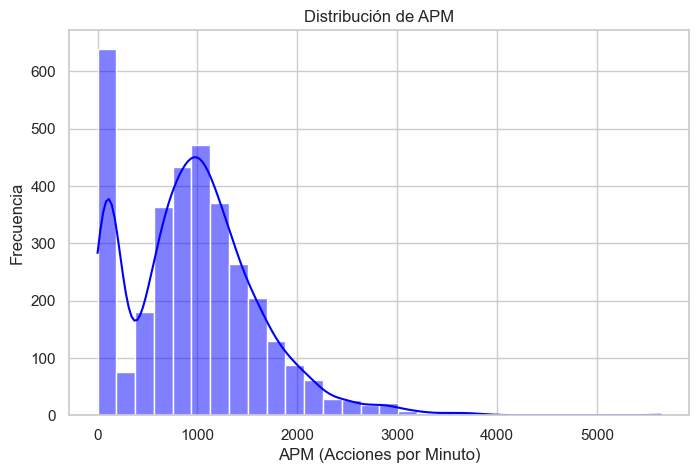

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(df['APM'], bins=30, kde=True, color='blue')
plt.title('Distribución de APM')
plt.xlabel('APM (Acciones por Minuto)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

La distribución de APM muestra que la mayoría de los jugadores se concentra en rangos entre 500 y 1500 acciones por minuto, lo que concuerda con niveles medios y avanzados de juego. Se observan algunos valores por encima de 3000 APM, que podrían corresponder a jugadores de alto rendimiento o a conductas de "spam" (acciones repetidas rápidamente sin efecto directo). La forma sesgada de la distribución sugiere que el APM puede ser un buen diferenciador entre jugadores promedio y de élite, pero también podría requerir normalización para ciertos modelos.

### Análisis del boxplot de APM

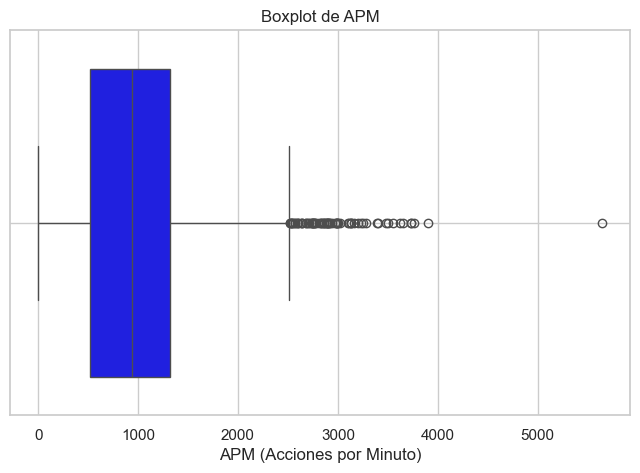

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['APM'], color='blue')
plt.title('Boxplot de APM')
plt.xlabel('APM (Acciones por Minuto)')
plt.grid(True)
plt.show()


El boxplot de APM muestra una distribución con una alta concentración entre los 500 y 1300 APM, con una mediana cercana a los 1000. Esto es consistente con los valores típicos de jugadores activos en StarCraft II. Se identifican múltiples valores atípicos (outliers) por encima de los 2500 APM, lo cual puede corresponder a jugadores de muy alto nivel o a comportamientos de spam de acciones sin impacto estratégico. La presencia de estos outliers sugiere que, si se desea aplicar modelado posterior, podría ser útil aplicar una transformación o normalización de esta variable.

### Outliers
Se ven muchos puntos fuera del bigote derecho, lo que significa que hay jugadores que superan el APM considerado típico.
Hay valores de APM entre 2000 y 5000, lo cual no es un error, pero sí representa a jugadores de ritmo extremadamente alto (tal vez profesionales o spam-clickers).

### Análisis de la variable LeagueIndex (Objetivo)

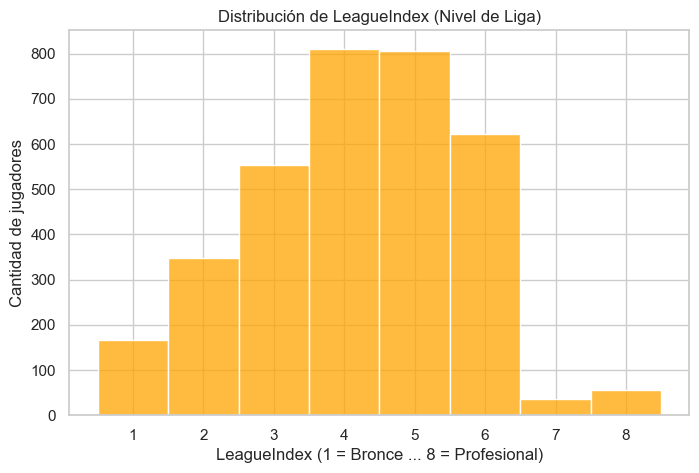

In [17]:
# Histograma de LeagueIndex
plt.figure(figsize=(8, 5))
sns.histplot(df['LeagueIndex'], bins=8, discrete=True, color='orange')
plt.title('Distribución de LeagueIndex (Nivel de Liga)')
plt.xlabel('LeagueIndex (1 = Bronce ... 8 = Profesional)')
plt.ylabel('Cantidad de jugadores')
plt.grid(True)
plt.show()


La distribución de LeagueIndex muestra una concentración de jugadores en los niveles medios (4 y 5), lo que es coherente con una curva de progresión natural en juegos competitivos. Las ligas bajas (1 y 2) y altas (7 y 8) tienen menor representación. Esto sugiere que la mayoría de los jugadores del dataset se encuentran en una etapa intermedia de desarrollo competitivo, lo cual es ideal para evaluar patrones de mejora y rendimiento.


### APM según LeagueIndex

C:\Users\Joey\AppData\Local\Temp\ipykernel_7612\2842722473.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='LeagueIndex', y='APM', data=df, palette='Blues')


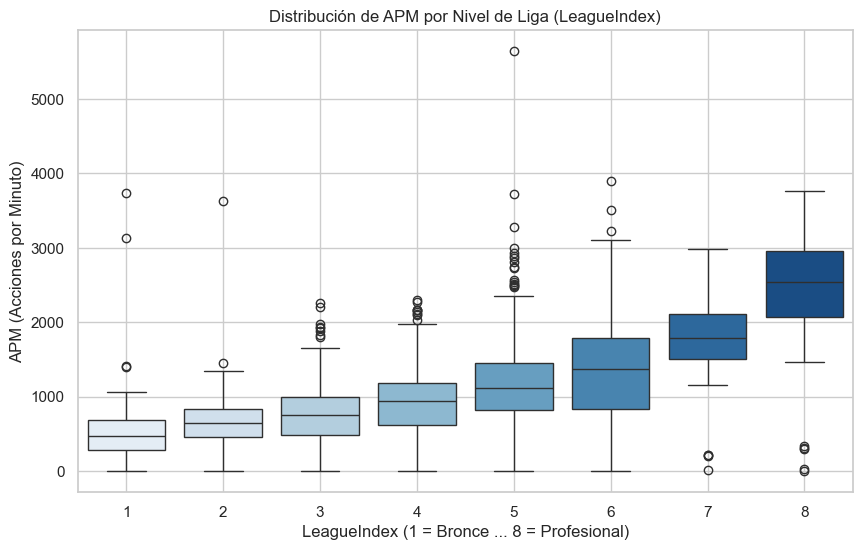

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='LeagueIndex', y='APM', data=df, palette='Blues')
plt.title('Distribución de APM por Nivel de Liga (LeagueIndex)')
plt.xlabel('LeagueIndex (1 = Bronce ... 8 = Profesional)')
plt.ylabel('APM (Acciones por Minuto)')
plt.grid(True)
plt.show()



El gráfico boxplot muestra una relación creciente entre el nivel competitivo (`LeagueIndex`) y las acciones por minuto (`APM`). A medida que aumenta el nivel de liga, se observa un incremento tanto en la mediana como en el rango intercuartílico del APM. Este comportamiento confirma la hipótesis de que un mayor APM se asocia con un mejor desempeño competitivo. Si bien existen valores atípicos en todas las ligas, la concentración de altos APM en las ligas superiores indica mayor dominio del juego y ejecución más intensiva.


### Analisis de TotalHours

In [19]:
print("Tipo de dato:", df['TotalHours'].dtype)
print("Valores nulos:", df['TotalHours'].isna().sum())
print("Primeros valores:")
print(df['TotalHours'].head())

Tipo de dato: float64
Valores nulos: 0
Primeros valores:
0    3000.0
1    5000.0
2     200.0
3     400.0
4     500.0
Name: TotalHours, dtype: float64


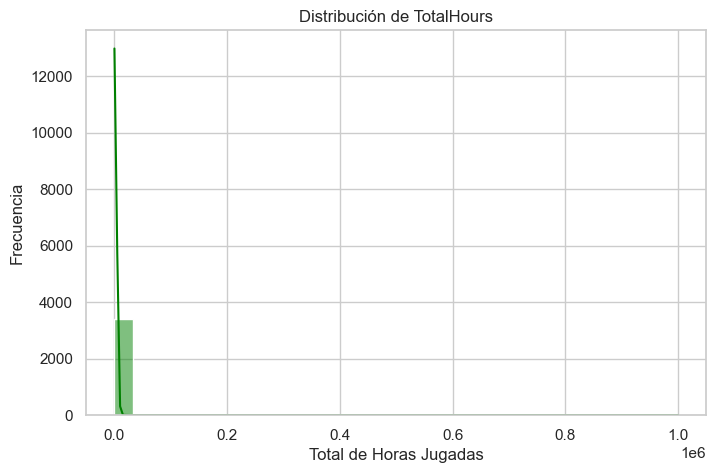

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(df['TotalHours'], bins=30, kde=True, color='green')
plt.title('Distribución de TotalHours')
plt.xlabel('Total de Horas Jugadas')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


### Forma de la distribución
La distribución está fuertemente sesgada a la derecha.

Hay una concentración masiva de jugadores con pocas horas jugadas (muy cerca del cero).

A medida que las horas aumentan, la cantidad de jugadores cae abruptamente.

Hay una cola larga que se extiende hacia la derecha, incluso hasta cerca de 1.000.000 horas, lo que sugiere outliers extremos.

¿Es esto correcto?
Sí y no:

-El gráfico refleja correctamente los datos.

-Pero la escala está tan dominada por los outliers que impide ver el comportamiento del grupo principal de jugadores.

Es por ello que mejoraremos la visualización de este limitando el eje X al percentil 95 para visualizar mejor los valores normales.

### Opción 1: Histograma recortado al percentil 95
Este método nos deja ver bien a los jugadores promedio, ocultando solo el 5% más extremo.

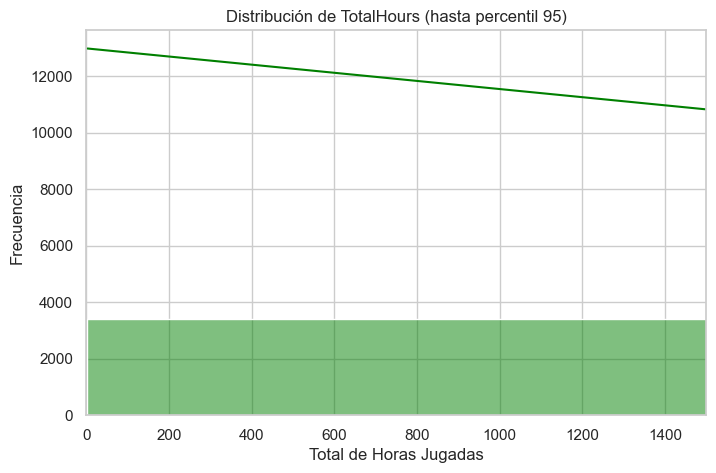

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(df['TotalHours'], bins=30, kde=True, color='green')
plt.title('Distribución de TotalHours (hasta percentil 95)')
plt.xlabel('Total de Horas Jugadas')
plt.ylabel('Frecuencia')
plt.xlim(0, df['TotalHours'].quantile(0.95))  # Cortar visualización en p95
plt.grid(True)
plt.show()


La mayoría de los jugadores tienen entre 0 y 1500 horas jugadas, con una alta concentración en valores bajos. Esto indica que el dataset está compuesto principalmente por jugadores con experiencia baja o media. Es una forma útil y clara de ver el comportamiento de la mayoría, sin que los valores extremos distorsionen la visualización.

### Opción 2: Histograma con log-transformación
Ideal si para conservar todos los datos pero comprimir la escala:

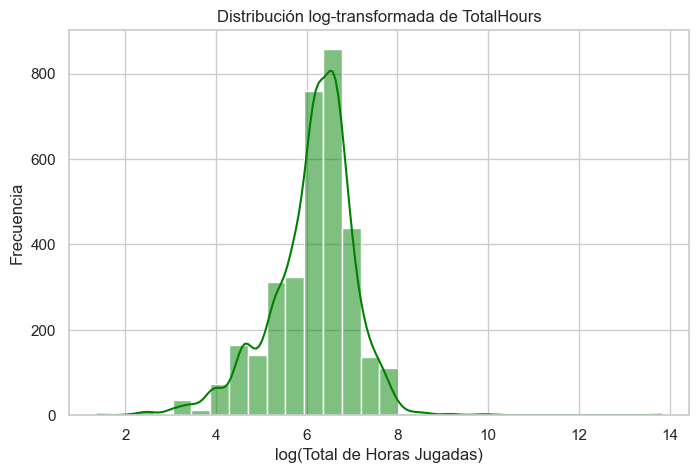

In [22]:
# Crear una columna transformada
df['TotalHours_log'] = np.log(df['TotalHours'] + 1)

plt.figure(figsize=(8, 5))
sns.histplot(df['TotalHours_log'], bins=30, kde=True, color='green')
plt.title('Distribución log-transformada de TotalHours')
plt.xlabel('log(Total de Horas Jugadas)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


La transformación logarítmica revela una distribución unimodal con asimetría leve hacia la derecha. Esto facilita futuros análisis estadísticos o modelado, ya que normaliza parcialmente la variable. Puede ser útil aplicar esta transformación en la fase de Data Preparation si se planea usar TotalHours como predictor.

### Análisis de Boxplot TotalHours

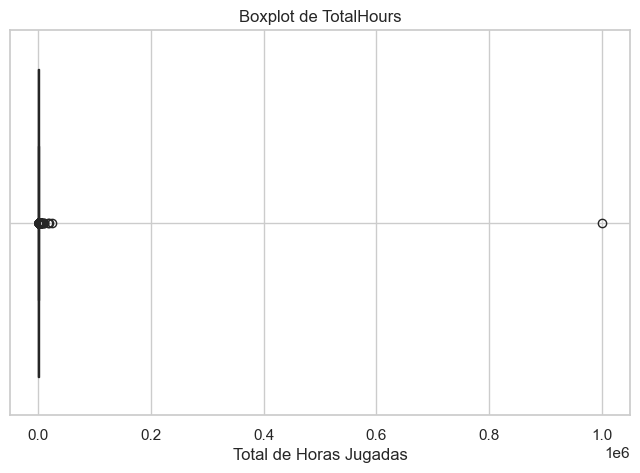

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['TotalHours'], color='green')
plt.title('Boxplot de TotalHours')
plt.xlabel('Total de Horas Jugadas')
plt.grid(True)
plt.show()


Tras realizar el gráfico de boxplot podemos interpretar lo siguiente:

Caja y bigotes están comprimidos en el margen izquierdo del gráfico.

El eje X va hasta 1e6 (un millón), lo que achata completamente la caja central, impidiendo ver la dispersión real de los datos útiles.

Hay muchos puntos fuera del rango normal, es decir, outliers claros.

El boxplot de TotalHours revela una fuerte presencia de valores atípicos, con un caso extremo cercano a un millón de horas jugadas. Esto impide visualizar adecuadamente la distribución central de los datos. Al limitar el eje X o aplicar una transformación logarítmica, se obtiene una visión más representativa del comportamiento real de la mayoría de los jugadores.

### Procedemos a realizar los ajustes correspondientes

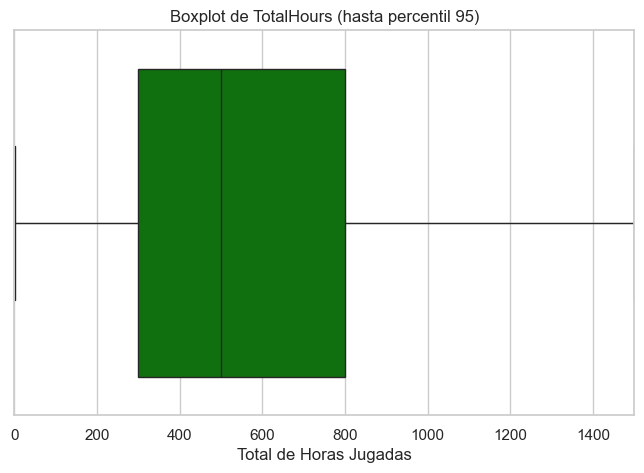

In [24]:
#Opción 1: Limitar el eje X (como hicimos con el histograma)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['TotalHours'], color='green')
plt.title('Boxplot de TotalHours (hasta percentil 95)')
plt.xlabel('Total de Horas Jugadas')
plt.xlim(0, df['TotalHours'].quantile(0.95))  # Cortar para enfocarse en datos reales
plt.grid(True)
plt.show()



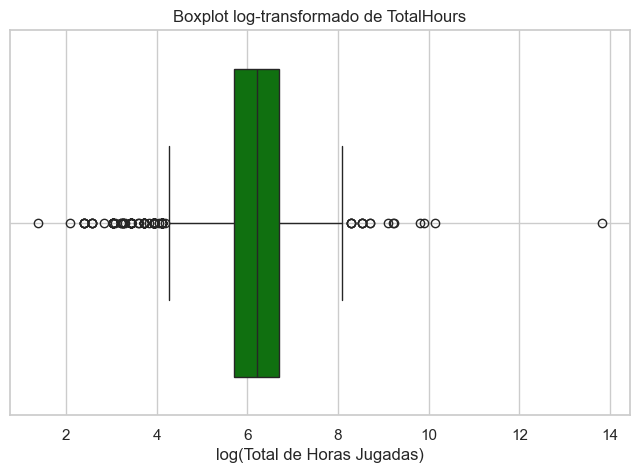

In [25]:
#Opción 2: Boxplot con log-transformación
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['TotalHours_log'], color='green')  # Asegúrate de tener esta columna creada
plt.title('Boxplot log-transformado de TotalHours')
plt.xlabel('log(Total de Horas Jugadas)')
plt.grid(True)
plt.show()


### Conclusión de TotalHours (Boxplot)

Dado que la variable TotalHours presenta valores extremadamente altos, se generaron dos visualizaciones complementarias. El boxplot limitado al percentil 95 permitió observar claramente que la mayoría de los jugadores ha acumulado entre 400 y 800 horas jugadas, con una mediana cercana a las 600 horas. Por otro lado, la transformación logarítmica ayudó a normalizar la escala y visualizar la distribución completa, revelando también jugadores con muy baja o excesiva cantidad de horas. Ambas visualizaciones son útiles: la primera para análisis descriptivo, y la segunda para preparación de datos en modelos.


### MinimapAttacks
Ahora trabajaremos con MinimapAttacks, que mide el uso estratégico del minimapa. Esta métrica es clave para evaluar la toma de decisiones tácticas en StarCraft II.s.


In [26]:
#Comprobamos que el tipo de dato sea correcto, que no existan nulos y valores pequeños o muy pequeños (como 0.00012, 0.001, etc.), lo cual es esperable en este tipo de métrica.
print("Tipo de dato:", df['MinimapAttacks'].dtype)
print("Valores nulos:", df['MinimapAttacks'].isna().sum())
print("Primeros valores:", df['MinimapAttacks'].head(10))


Tipo de dato: object
Valores nulos: 0
Primeros valores: 0    0.000109849
1    0.000294057
2    0.000293624
3       5.33e-05
4              0
5              0
6              0
7    0.001163531
8       1.88e-05
9        2.5e-05
Name: MinimapAttacks, dtype: object


El tipo de dato object confirma que MinimapAttacks se está tratando como texto (str), no como valores numéricos. Esto es común cuando hay números en notación científica (1.88e-05, etc.).

### Limpieza y conversión a numérico

In [27]:
#Reemplazar comas por puntos (si hubiera) y convertir a float
df['MinimapAttacks'] = df['MinimapAttacks'].replace(',', '.', regex=True).astype(float)
#Aun si no hay comas, esta línea no genera errores y asegura uniformidad.

In [28]:
#Verificamos la conversión
print("Nuevo tipo de dato:", df['MinimapAttacks'].dtype)
print(df['MinimapAttacks'].describe())


Nuevo tipo de dato: float64
count    3395.000000
mean        0.000098
std         0.000166
min         0.000000
25%         0.000000
50%         0.000040
75%         0.000119
max         0.003019
Name: MinimapAttacks, dtype: float64


Conclusión preliminar:
Hay una gran parte de jugadores con nulo o muy bajo uso táctico del minimapa.

Esto sugiere que MinimapAttacks es una excelente métrica diferenciadora entre jugadores promedio y avanzados.

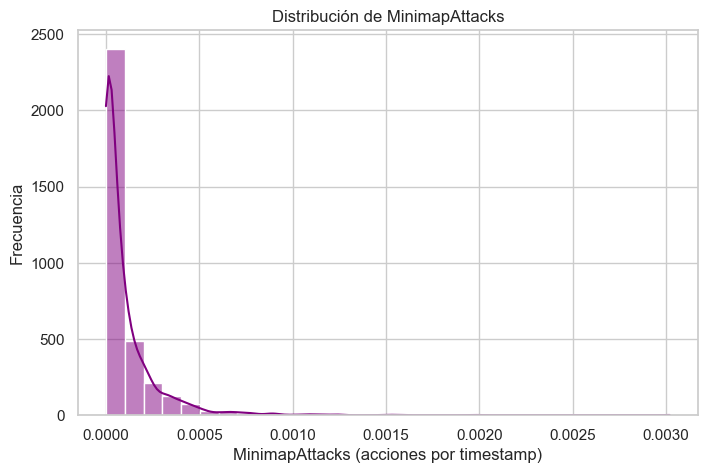

In [29]:
plt.figure(figsize=(8, 5))
sns.histplot(df['MinimapAttacks'], bins=30, kde=True, color='purple')
plt.title('Distribución de MinimapAttacks')
plt.xlabel('MinimapAttacks (acciones por timestamp)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


Distribución fuertemente sesgada a la derecha.

Casi todos los jugadores tienen valores muy cercanos a cero.

Hay un grupo reducido que realiza acciones frecuentes usando el minimapa (valores de hasta 0.003).

La gran mayoría de los jugadores casi no realiza ataques usando el minimapa, lo cual puede indicar un bajo nivel estratégico. El uso intensivo del minimapa parece estar limitado a unos pocos jugadores, probablemente más experimentados o competitivos.

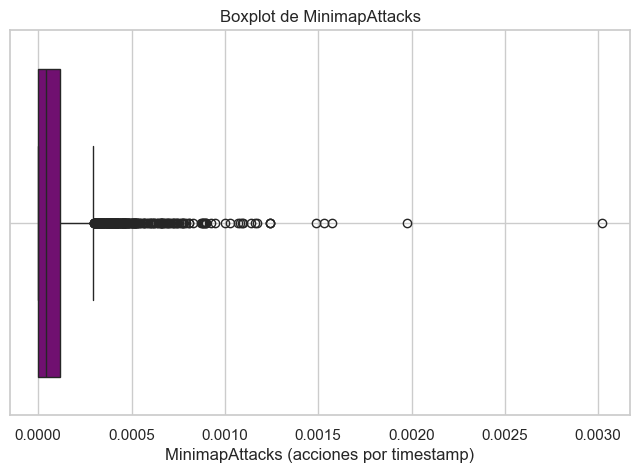

In [30]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['MinimapAttacks'], color='purple')
plt.title('Boxplot de MinimapAttacks')
plt.xlabel('MinimapAttacks (acciones por timestamp)')
plt.grid(True)
plt.show()


Caja y bigotes aplastados a la izquierda, con una mediana extremadamente baja.

Muchos outliers positivos, representando a jugadores con uso estratégico más avanzado del minimapa.

El boxplot confirma la distribución asimétrica y la alta concentración en valores bajos.

### Análisis de MinimapAttacks

La distribución de MinimapAttacks muestra un comportamiento altamente asimétrico, con la mayoría de los jugadores registrando valores cercanos a cero. Esto indica que el uso del minimapa como herramienta ofensiva es escaso en la muestra, probablemente reflejando una falta de estrategia táctica en jugadores de niveles bajos o medios. El boxplot refuerza esta idea, evidenciando una concentración de valores mínimos y la presencia de múltiples valores atípicos hacia la derecha, representando a jugadores con mayor dominio estratégico del juego.


Vamos a crear un boxplot cruzado entre LeagueIndex y MinimapAttacks, para evaluar si los jugadores de ligas más altas usan más el minimapa estratégicamente.

### Uso del minimapa vs nivel competitivo

C:\Users\Joey\AppData\Local\Temp\ipykernel_7612\2665331510.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='LeagueIndex', y='MinimapAttacks', data=df, palette='Purples')


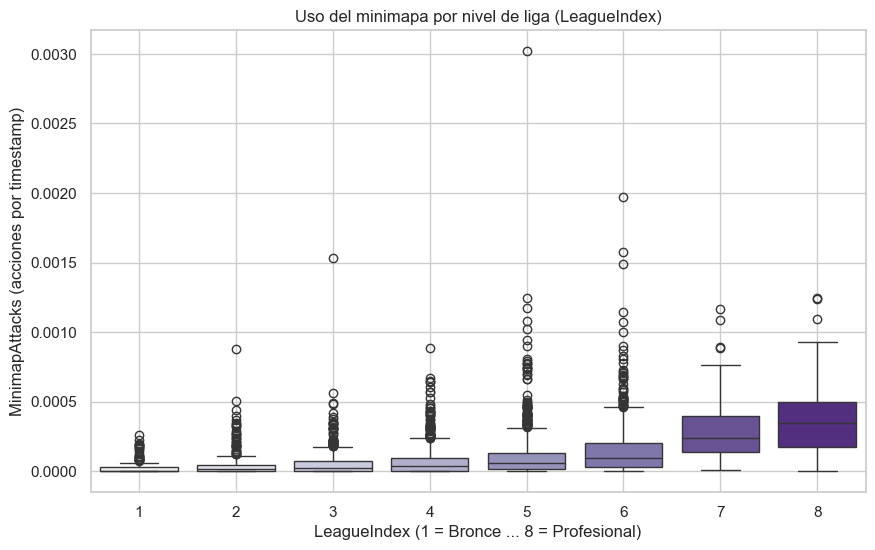

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='LeagueIndex', y='MinimapAttacks', data=df, palette='Purples')
plt.title('Uso del minimapa por nivel de liga (LeagueIndex)')
plt.xlabel('LeagueIndex (1 = Bronce ... 8 = Profesional)')
plt.ylabel('MinimapAttacks (acciones por timestamp)')
plt.grid(True)
plt.show()


Tendencia clara:
A medida que aumenta el LeagueIndex, también aumenta la mediana y el rango intercuartílico de MinimapAttacks.

Los jugadores en ligas altas (6, 7, 8) usan el minimapa mucho más frecuentemente que los de ligas bajas.

### En ligas bajas (1–3):
Medianas cercanas a cero.

Poco o ningún uso del minimapa como herramienta ofensiva.

### En ligas altas (6–8):
Medianas más elevadas y distribuciones más amplias.

Jugadores más estratégicos, con uso consistente del minimapa.

### Outliers
Presentes en todos los niveles, pero más frecuentes en ligas medias y altas.

Pueden representar jugadores con estilos extremos o prácticas intensivas.

### Insight
### Relación entre MinimapAttacks y LeagueIndex

El gráfico boxplot revela una clara relación positiva entre el uso del minimapa para ataques (`MinimapAttacks`) y el nivel competitivo del jugador (`LeagueIndex`). Las ligas más bajas (1 a 3) muestran un uso prácticamente nulo del minimapa, mientras que las ligas más altas (6 a 8) presentan un uso mucho más frecuente y consistente. Esto sugiere que el uso táctico del minimapa es una habilidad distintiva de los jugadores más avanzados, lo que posiciona a `MinimapAttacks` como un KPI valioso para predecir el rendimiento competitivo.



### Antes de finalizar la fase
Se generará un mapa de correlacion (calor o heatmap) para cerrar esta fase con un resumen visual de cómo se relacionan las variables entre sí, especialmente respecto a la variable objetivo: LeagueIndex.

In [32]:
#Seleccionamos las columnas relevantes numéricas
features_corr = [
    'LeagueIndex', 
    'APM', 
    'TotalHours', 
    'MinimapAttacks', 
    'HoursPerWeek',
    'ActionLatency',
    'TotalMapExplored'
]


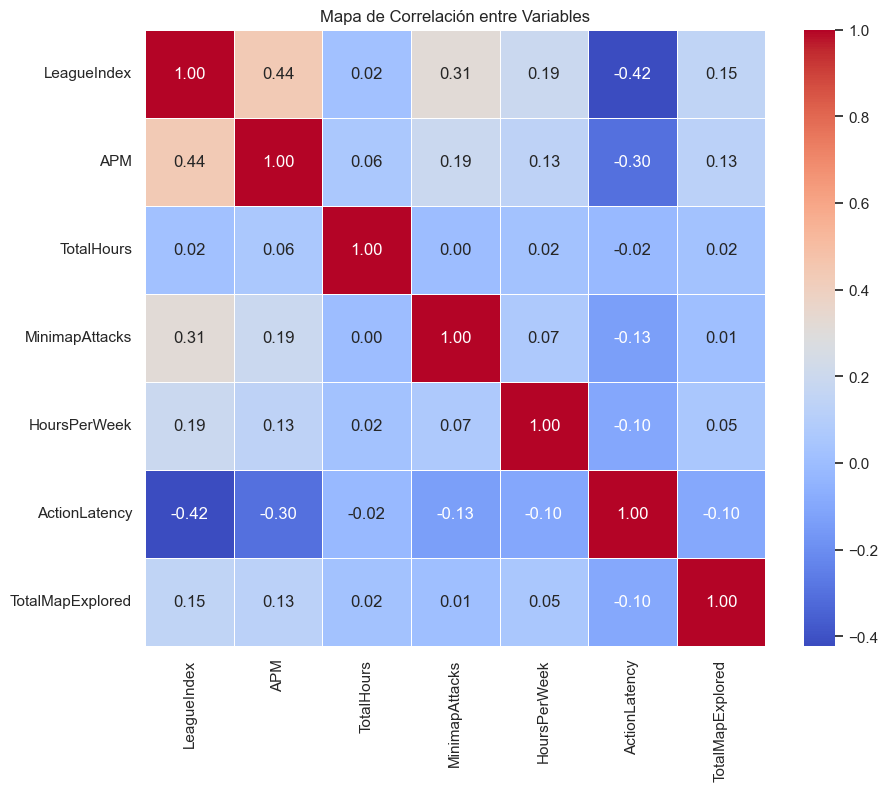

In [33]:
# Matriz de correlación
corr_matrix = df[features_corr].corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Correlación entre Variables')
plt.show()

* APM	correlación con LeagueIndex	+0.44 = Moderada → A mayor APM, mayor nivel competitivo
* MinimapAttacks correlación con LeagueIndex +0.31 = Débil–Moderada → Mayor uso del minimapa se asocia a ligas más altas
* ActionLatency correlación con LeagueIndex -0.42 = Moderada negativa → Jugadores más competitivos reaccionan más rápido
* HoursPerWeek correlación con LeagueIndex +0.19 = Débil → Más horas semanales se asocian levemente a mejor nivel
* TotalMapExplored correlación con LeagueIndex +0.15 = Muy débil → Podría tener un ligero impacto estratégico
* TotalHours correlación con LeagueIndex +0.02 = Nula → La experiencia total no predice directamente el nivel competitivo	

### Insight principal:
Las variables más correlacionadas con el rendimiento competitivo (LeagueIndex) son:

APM (positiva)

MinimapAttacks (positiva)

ActionLatency (negativa)

Esto confirma los KPIs que seleccionamos y valida las hipótesis previas: que la velocidad, precisión y estrategia táctica están más relacionadas con el nivel competitivo que simplemente las horas jugadas.

### Análisis de correlación

El mapa de correlación revela que las variables más asociadas con el rendimiento competitivo (`LeagueIndex`) son `APM` (+0.44), `MinimapAttacks` (+0.31) y `ActionLatency` (−0.42). Esto indica que los jugadores más exitosos en StarCraft II tienden a ser más rápidos, estratégicos y con menor latencia en sus decisiones. Por otro lado, variables como `TotalHours` o `HoursPerWeek` presentan correlaciones débiles, sugiriendo que la experiencia acumulada no es necesariamente indicativa de mayor rendimiento si no va acompañada de habilidad y toma de decisiones optimizada.


### Recomendaciones para los próximos pasos



Con base en los hallazgos obtenidos durante la exploración de datos, se sugieren las siguientes acciones para la siguiente fase del proceso CRISP-DM:

1. **Normalización o estandarización de variables numéricas:**
   - Dado que variables como `APM`, `TotalHours` y `MinimapAttacks` tienen escalas muy diferentes, se recomienda aplicar técnicas como `StandardScaler` o `MinMaxScaler` para homogeneizar las unidades antes de utilizarlas en modelos.

2. **Transformaciones logarítmicas:**
   - Aplicar log-transformación a variables sesgadas positivamente como `TotalHours` y `MinimapAttacks` puede mejorar la distribución para modelos sensibles a la normalidad (e.g., regresión lineal).

3. **Tratamiento de outliers:**
   - Considerar eliminar o recodificar valores extremos (como aquellos cercanos al millón de horas en `TotalHours`) para evitar sesgos en los modelos predictivos.
   - Alternativamente, aplicar robustecimiento mediante `RobustScaler` o usar algoritmos insensibles a outliers (e.g., árboles).

4. **Selección de características (feature selection):**
   - Priorizar las variables que mostraron mayor correlación con `LeagueIndex`, como:
     - `APM`
     - `MinimapAttacks`
     - `ActionLatency`
   - Considerar eliminar o dejar en segundo plano variables con bajo aporte explicativo como `TotalHours`.

5. **Generación de nuevas variables (feature engineering):**
   - Podría explorarse la creación de métricas combinadas (por ejemplo: `APM/ActionLatency` o `MinimapAttacks * TotalMapExplored`) para capturar comportamientos estratégicos más complejos.

6. **Codificación y balanceo de la variable objetivo (`LeagueIndex`):**
   - Si se utiliza un modelo supervisado de clasificación, evaluar si las clases están desbalanceadas y aplicar técnicas como sobremuestreo (`SMOTE`) o agrupamiento de clases si es necesario.

---

Estas recomendaciones permitirán construir una base sólida y consistente para los procesos de modelado y evaluación en las siguientes etapas del proyecto.


# FASE 3 : Data Preparation

### 3.1 Selección y limpieza de características

* Durante esta fase, se va a seleccionar la variable que más nos aporta al rendimiento, nuestra variable objetivo LeagueIndex.
* Se eliminarán columnas irrelevantes o ruidosas como GameID
* Mantendremos solo las variables numéricas y limpias para el modelado

In [34]:
# Eliminar columnas que no aportan valor predictivo directo
df_model = df.drop(columns=['GameID'])

In [35]:
# Seleccionar las features relevantes según análisis previo
features_selected = [
    'LeagueIndex',
    'APM',
    'MinimapAttacks',
    'ActionLatency',
    'TotalMapExplored',
    'HoursPerWeek',
    'TotalHours_log'  # versión transformada anteriormente
]

In [36]:
# Crearemos un nuevo DataFrame con las columnas seleccionadas
df_model = df_model[features_selected]

In [37]:
# Verificamos tipos y estructura
print("Columnas seleccionadas para modelado:")
print(df_model.dtypes)
df_model.head()

Columnas seleccionadas para modelado:
LeagueIndex           int64
APM                 float64
MinimapAttacks      float64
ActionLatency         int64
TotalMapExplored    float64
HoursPerWeek        float64
TotalHours_log      float64
dtype: object


,LeagueIndex,APM,MinimapAttacks,ActionLatency,TotalMapExplored,HoursPerWeek,TotalHours_log
0,5,143.718,0.000110,408673,219697.0,10.0,8.006701
1,5,1292.322,0.000294,423454,380544.0,10.0,8.517393
2,4,699.612,0.000294,753548,230705.0,10.0,5.303305
3,3,1076.016,0.000053,537352,202446.0,20.0,5.993961
4,3,1228.908,0.000000,620813,288817.0,10.0,6.216606


## Justificación de la seleccion:
* LeagueIndex: Variable objetivo (target).
* APM: Alta correlación positiva con rendimiento competitivo.
* MinimapAttacks: Métrica táctica diferenciadora entre jugadores novatos y expertos.
* ActionLatency: Correlación negativa significativa - menor latencia, mejor jugador.
* TotalMapExplored: Uso del mapa - puede influir en nivel estratégico.
* HoursPerWeek: Representa nivel de compromiso semanal.
* TotalHours_log: Transformación normalizada de la experiencia total.

### 3.2 Tratamiento de Outliers

Antes de continuar con cualquier transformación o escalamiento primero tratamos los outliers. Las transformaciones como log, Min-Max o StandardScaler son sensibles a valores extremos y podrían deformar la escala del resto de los datos, generar distribuciones artificialmente sesgadas o también ocultar o exagerar patrones. Los outliers afectan especialmente los modelos supervisados paramétricos que trabajaremos más adelante (regresión lineal, SVM, Naive Bayes). Es por esto que una vez tratados los outliers (recodificados, eliminados o suavizados), las transformaciones reflejan mejor la estructura real de los datos. Comencemos con el tratamiento de outliers en las tres variables más importantes y con comportamiento extremo confirmado: APM, MinimapAttacks y TotalHours_log (ya transformada pero aún podría tener extremos). Para el tratamiento de estos se utilizará el método IQR (Interquartile Range), para detectar valores atípicos en las variables numéricas y la técnica de winsorización, técnica de tratamiento de outliers que no elimina filas, en vez de borrar datos extremos, los recorta a los límites establecidos.

In [38]:
#Detectar outliers usando el método IQR
def detectar_outliers_iqr(serie):
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return limite_inferior, limite_superior

# Calcular límites para cada variable
variables = ['APM', 'MinimapAttacks', 'TotalHours_log']
outlier_limits = {}

for var in variables:
    li, ls = detectar_outliers_iqr(df_model[var])
    outlier_limits[var] = (li, ls)
    print(f"{var}: inferior={li:.2f}, superior={ls:.2f}")


APM: inferior=-673.22, superior=2518.36
MinimapAttacks: inferior=-0.00, superior=0.00
TotalHours_log: inferior=4.24, superior=8.15


Interpretemos los resultados:
APM
* Límite inferior: −673.22 - No hay APM negativos, así que no se afectará por abajo.
* Límite superior: 2518.36 - Cualquier APM superior a este valor se recortará a 2518.36.
* Solo se recortarán algunos valores muy altos de APM (jugadores extremos), lo cual es razonable.

MinimpAttacks
* Límite inferior y superior : 0
* Esto ocurre porque el 25% y el 75% de los datos son iguales (0) - hay poca variabilidad y muchos ceros.
* No conviene winsorizar esta variable con IQR porque recortaría todo por encima de 0 (lo que eliminaría cualquier valor real).
* Es mejor tratar esta variable con log o normalizar directamente, ya que sus outliers son valores útiles.

TotalHours_log
* Límite inferior: 4.24 = log(70 horas)
* Límite superior: 8.15 = log(3,500 horas)
* Se eliminarán valores extremos como los que veníamos viendo (>10). Este recorte es sano y realista para modelado.

Solo aplicaremos el recorte de winsorización a APM y TotalHours_log, no recortaremos MinimapAttacks. Luego la transformaremos o normalizaremos.

Antes de realizar el recorte en nuestras variables, haremos una copia de estas para posteriormente graficarlas y compararlas en su estado anterior al recorte y el nuevo.

In [39]:
# Guardamos copias originales de APM y TotalHours_log antes del recorte
df_model['APM_original'] = df_model['APM']
df_model['TotalHours_log_original'] = df_model['TotalHours_log']


In [40]:
# Aplicamos winsorización solo en las dos variables donde tiene sentido APM y TotalHours con límites IQR
for var in ['APM', 'TotalHours_log']:
    li, ls = outlier_limits[var]
    df_model[var] = df_model[var].clip(lower=li, upper=ls)


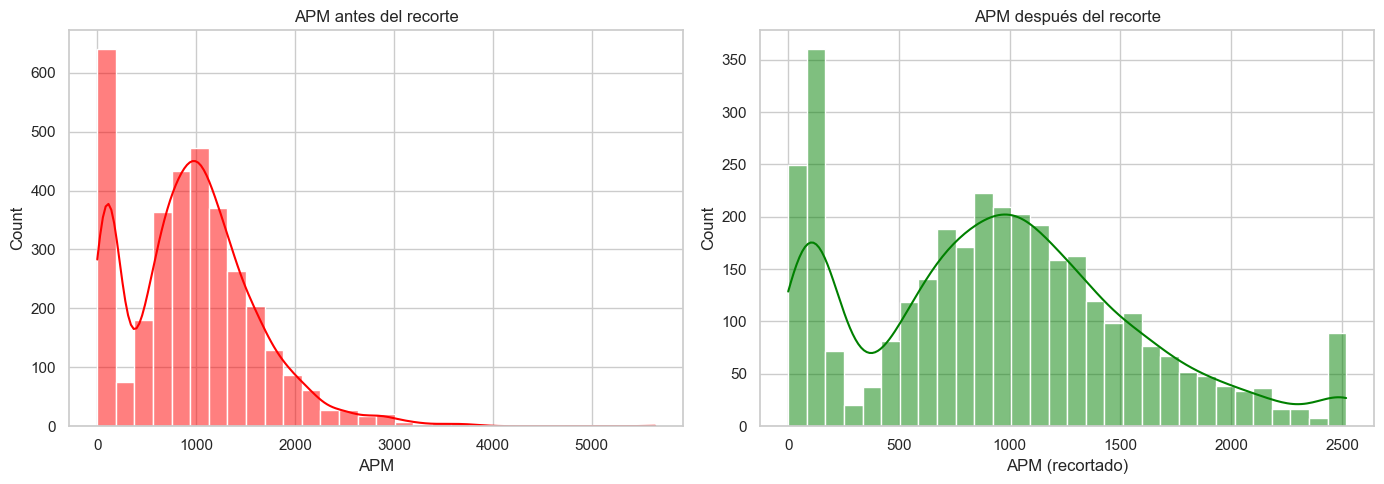

In [41]:
#APM antes y despues del recorte
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_model['APM_original'], bins=30, kde=True, color='red')
plt.title('APM antes del recorte')
plt.xlabel('APM')

plt.subplot(1, 2, 2)
sns.histplot(df_model['APM'], bins=30, kde=True, color='green')
plt.title('APM después del recorte')
plt.xlabel('APM (recortado)')

plt.tight_layout()
plt.show()


Antes del recorte podemos observar que presentaba una cola derecha larga (distribución asimétrica positiva).
Algunos valores extremos (outliers) superaban los 5000 APM, lo cual es irreal o poco representativo del jugador promedio. 

Al realizar recorte el histograma quedó más concentrado entre 0 y 2500 (que fue el límite IQR superior). 

Se mantiene la forma general, pero se eliminó la cola extrema, lo que hace que la media y desviación estándar reflejen mejor el comportamiento real.

Los modelos que usemos más adelante no se sesguen por casos atípicos.

Este resultado nos será útil para el modelado supervisado.

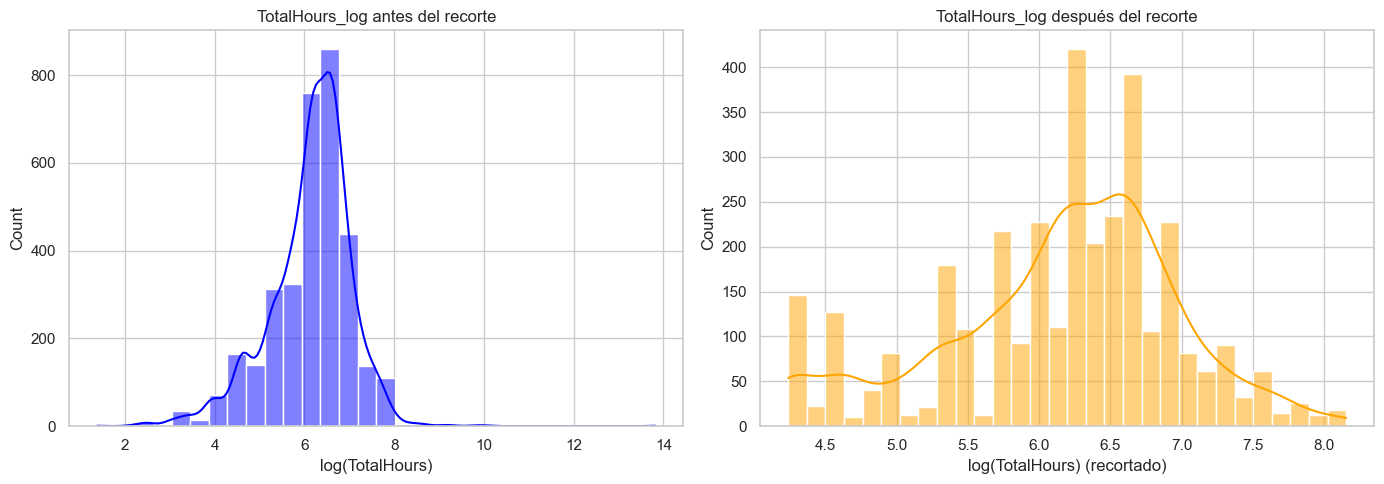

In [42]:
#TotalHours después del recorte
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_model['TotalHours_log_original'], bins=30, kde=True, color='blue')
plt.title('TotalHours_log antes del recorte')
plt.xlabel('log(TotalHours)')

plt.subplot(1, 2, 2)
sns.histplot(df_model['TotalHours_log'], bins=30, kde=True, color='orange')
plt.title('TotalHours_log después del recorte')
plt.xlabel('log(TotalHours) (recortado)')

plt.tight_layout()
plt.show()


Para el caso de TotalHours, antes del recorte de outliers teníamos una distribución tipo campana, pero con una cola larga hacia la derecha y había jugadores con log(hrs) > 10 = más de 22.000 horas.

Después del recorte se cortó a log(hrs) = 8.15 (aprox 3500 horas).
El nuevo histograma se mantiene simétrico y concentrado, lo que lo hace ideal para modelos basados en regresión y métodos sensibles a distribución, como Naive Bayes o PCA.

Ambas variables han sido transformadas correctamente. Se mantuvo su distribución general, se eliminaron valores extremos que podían distorsionar la escala y están listas para ser escaladas o normalizadas.

### 3.3 Normalización de Variables

Dado que planeamos probar varios tipos de modelos, tanto supervisados (regresión lineal, árboles, SVM) como no supervisados (K-Means), la mejor opción es aplicar StandardScaler, ya que es más robusto ante colas o valores dispersos (como lo que teníamos en APM y TotalHours), es compatible con la mayoría de los modelos vistos en clase y aumenta estabilidad en métodos como SVM, Naive Bayes, y Regresión.

In [43]:
#Importamos y preparamos las columnas a escalar

from sklearn.preprocessing import StandardScaler

# Columnas numéricas a estandarizar
variables_escalar = [
    'APM',
    'MinimapAttacks',
    'ActionLatency',
    'TotalMapExplored',
    'HoursPerWeek',
    'TotalHours_log'
]


Creamos una lista con los nombres de las columnas numéricas que queremos transformar. Estas variables ya fueron:

Limpias (sin valores nulos ni errores de tipo).

Recortadas en los casos de outliers (APM, TotalHours_log).

Transformadas si era necesario (log, etc).

Esta lista es clave para indicarle al escalador qué columnas transformar sin tocar LeagueIndex, que es la variable objetivo.

In [44]:
# Creamos el scaler
scaler = StandardScaler()

# Ajustamos y transformamos
df_model_scaled = df_model.copy()
df_model_scaled[variables_escalar] = scaler.fit_transform(df_model_scaled[variables_escalar])


StandardScaler() crea el objeto que se encargará de calcular la media y desviación estándar de cada columna. fit_transform() calcula la media y std de cada variable.
Transforma los valores con la fórmula z=x−μ/σ

Luego guarda el resultado en un nuevo dataframe (df_model_scaled), dejando los datos originales intactos.

Al final, todas las variables indicadas quedan centradas (media 0) y escaladas (std 1).

In [45]:
# Comprobamos que media sea 0 y std 1
df_model_scaled[variables_escalar].describe().T[['mean', 'std']]


,mean,std
APM,-4.185819e-17,1.000147
MinimapAttacks,3.767237e-17,1.000147
ActionLatency,-1.213887e-16,1.000147
TotalMapExplored,6.069437e-17,1.000147
HoursPerWeek,-7.115892e-17,1.000147
TotalHours_log,5.106699e-16,1.000147


Usamos describe() para calcular estadísticas de las columnas escaladas.
.T transpone la tabla para que cada fila sea una variable (y las columnas sean "mean", "std", etc).
mean y std nos filtra solo las columnas relevantes para verificar si el escalado funcionó correctamente, donde efectivamente se puede observar que mean nos dio como resultado 0 y std 1.

Ya que hemos realizado selección de variables relevantes, limpieza de valores nulos, detección y tratamiento de outliers, transformaciones numéricas y escalado de variables nos quedaría realizar una división de variables independientes y de target para dar por finalizada la fase 3 de data preparation y comenzar a modelar.

### 3.4 División entre variables independientes (X) y target (y)

In [46]:
# Variable objetivo
y = df_model_scaled['LeagueIndex']

#Variables predictoras (sin LeagueIndex)
X = df_model_scaled.drop(columns=['LeagueIndex'])

# FASE 4 : Moddeling

Durante el desarrollo de esta fase probaremos distintos modelos vistos en clases para comparar su desempeño, endender cuál se adapta mejor al problema y los datos y seleccionar el más adecuado según los KPIs del negocio.

Dado que nuestra variable objetivo LeagueIndex es una variable categórica ordinal (niveles del 1 al 8), se trata de un problema de clasificación multiclase. Es por esto que los modelos que estaremos revisando durante este apartado serán Lineal paramétrico (regresión logística), probabilístico Naive Bayes (Gaussiano), Árbol de decisión (DecisionTreeClassifier), Ensamble (Random Forest), SVM (SVC multiclase con kernel) y para modelos no supervisados utilizaremos K-Means para descubrir agrupamientos naturales y PCA (análisis de componentes) para reducción de dimensionalidad.

## MODELOS SUPERVISADOS

## 1. Modelos de Clasificación

## 1.1 Árbol de Decisión

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
# Variables predictoras (usa las que seleccionaste y escalaste)
X = df_model_scaled[['APM', 'MinimapAttacks', 'ActionLatency', 'TotalMapExplored', 'HoursPerWeek', 'TotalHours_log']]

# Variable objetivo (LeagueIndex)
y = df_model_scaled['LeagueIndex']

# División en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Crear y entrenar el modelo
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [50]:
# Predicciones
y_pred = dt_model.predict(X_test)

In [51]:
# Evaluación del modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Matriz de Confusión:
[[10  8  5  4  3  1  0  0]
 [12 16 31 14  5  2  0  0]
 [ 8 18 30 24 23  8  1  0]
 [ 4 18 33 41 43 25  3  0]
 [ 2  8 20 41 46 36  3  2]
 [ 0  1 12 15 39 47  1  2]
 [ 0  0  0  0  1  3  0  0]
 [ 0  0  0  0  0  1  0  9]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.28      0.32      0.30        31
           2       0.23      0.20      0.21        80
           3       0.23      0.27      0.25       112
           4       0.29      0.25      0.27       167
           5       0.29      0.29      0.29       158
           6       0.38      0.40      0.39       117
           7       0.00      0.00      0.00         4
           8       0.69      0.90      0.78        10

    accuracy                           0.29       679
   macro avg       0.30      0.33      0.31       679
weighted avg       0.29      0.29      0.29       679



Tras haber probado el primer modelo de clasificación, podemos observar que nuestro resultado es bastante pobre. Con un accuracy de solo 0.29, es necesario aplicar SMOTE (Synthetic Minority Oversampling Technique) que es totalmente adecuado para este caso, ya que nos genera datos sintéticos para las clases minoritarias, mejora el balance del dataset antes de entrenar el modelo y puede ayudarnos a obtener un modelo más robusto y mejorar métricas como el F1-score y la precisión.

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
# Aplicamos SMOTE solo a los datos de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [54]:
# Reentrenamos el modelo
dt_model_smote = DecisionTreeClassifier(random_state=42)
dt_model_smote.fit(X_train_res, y_train_res)

DecisionTreeClassifier(random_state=42)

In [55]:
# Predicciones y evaluación
y_pred_smote = dt_model_smote.predict(X_test)

print("Matriz de Confusión con SMOTE:")
print(confusion_matrix(y_test, y_pred_smote))

print("\nReporte de Clasificación con SMOTE:")
print(classification_report(y_test, y_pred_smote))

Matriz de Confusión con SMOTE:
[[17  5  3  4  2  0  0  0]
 [17 14 21 19  7  2  0  0]
 [ 8 22 24 28 21  9  0  0]
 [ 4 24 36 44 39 20  0  0]
 [ 1 11 19 34 51 34  8  0]
 [ 1  3 11 16 32 41 11  2]
 [ 0  0  0  0  1  2  1  0]
 [ 0  0  0  0  0  0  0 10]]

Reporte de Clasificación con SMOTE:
              precision    recall  f1-score   support

           1       0.35      0.55      0.43        31
           2       0.18      0.17      0.18        80
           3       0.21      0.21      0.21       112
           4       0.30      0.26      0.28       167
           5       0.33      0.32      0.33       158
           6       0.38      0.35      0.36       117
           7       0.05      0.25      0.08         4
           8       0.83      1.00      0.91        10

    accuracy                           0.30       679
   macro avg       0.33      0.39      0.35       679
weighted avg       0.30      0.30      0.30       679



Observaciones tras haber aplicado smote

* El F1-score general pasó de 0.29 a 0.30 (ligera mejora).
* El recall para la clase 1 subió de 0.32 a 0.55 → positivo.
* La clase 8 sigue muy bien (aunque tiene pocos datos).
* Clases como la 7 siguen siendo muy problemáticas, probablemente por su baja representación.

El modelo de Árbol de Decisión con SMOTE mejora ligeramente la detección de ciertos perfiles de jugadores, especialmente aquellos de bajo rendimiento.
* Sin embargo, el modelo sigue siendo débil para predecir consistentemente el nivel competitivo.
* Esto sugiere que, actualmente, las variables utilizadas no explican suficientemente bien la clasificación de los jugadores.
* Aún así, sirve como un primer acercamiento para segmentar y comenzar a tomar medidas sobre los jugadores más vulnerables al abandono.

## 1.2 Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
# Aplicamos SMOTE solo a los datos de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [58]:
# Creamos y entrenamos el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [59]:
# Predicciones y evaluación
y_pred_rf = rf_model.predict(X_test)

print("Matriz de Confusión - Random Forest con SMOTE:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nReporte de Clasificación - Random Forest con SMOTE:")
print(classification_report(y_test, y_pred_rf))

Matriz de Confusión - Random Forest con SMOTE:
[[20  4  1  3  3  0  0  0]
 [22 14 30 12  2  0  0  0]
 [12 18 37 24 16  5  0  0]
 [ 2 17 38 53 40 15  2  0]
 [ 1  2 19 40 57 34  4  1]
 [ 0  0  6 11 33 57  8  2]
 [ 0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  0 10]]

Reporte de Clasificación - Random Forest con SMOTE:
              precision    recall  f1-score   support

           1       0.35      0.65      0.45        31
           2       0.25      0.17      0.21        80
           3       0.28      0.33      0.30       112
           4       0.37      0.32      0.34       167
           5       0.38      0.36      0.37       158
           6       0.50      0.49      0.49       117
           7       0.00      0.00      0.00         4
           8       0.77      1.00      0.87        10

    accuracy                           0.37       679
   macro avg       0.36      0.41      0.38       679
weighted avg       0.37      0.37      0.36       679



Accuracy subió de 0.29 (Árbol sin SMOTE) a 0.37 → lo cual demuestra una mejora significativa.

* Macro promedio F1-score:

Pasó de 0.31 a 0.38 → El modelo tiene mejor rendimiento general considerando todas las clases por igual.

* Casos específicos:

Clase 1: F1-score sube a 0.45, con buen recall (0.65) → Detecta mejor a los jugadores de bajo nivel, útiles para retención.

Clases 4, 5, 6: F1-scores alrededor de 0.34 - 0.49, aceptables dado el desbalance.

Clase 8 (nivel alto): F1-score de 0.87, excelente detección de jugadores top, importante para mantener a los jugadores competitivos.

Clase 7: Sigue sin poder ser detectada, probablemente por su bajísima representación en el test.

## 1.3 SVM con Smote

In [60]:
from sklearn.svm import SVC

In [61]:
# Aplicamos SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [62]:
# Creamos y entrenamos el modelo SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train_res, y_train_res)

SVC(random_state=42)

In [63]:
# Predicciones y evaluación
y_pred_svm = svm_model.predict(X_test)

print("Matriz de Confusión - SVM con SMOTE:")
print(confusion_matrix(y_test, y_pred_svm))

print("\nReporte de Clasificación - SVM con SMOTE:")
print(classification_report(y_test, y_pred_svm))

Matriz de Confusión - SVM con SMOTE:
[[21  2  5  2  1  0  0  0]
 [32 15 19 11  3  0  0  0]
 [13 26 24 27 15  6  1  0]
 [ 7 18 30 50 38 16  5  3]
 [ 2  3 15 40 47 40  7  4]
 [ 1  0  1 14 22 51 20  8]
 [ 0  0  0  0  1  3  0  0]
 [ 0  0  0  0  0  0  0 10]]

Reporte de Clasificación - SVM con SMOTE:
              precision    recall  f1-score   support

           1       0.28      0.68      0.39        31
           2       0.23      0.19      0.21        80
           3       0.26      0.21      0.23       112
           4       0.35      0.30      0.32       167
           5       0.37      0.30      0.33       158
           6       0.44      0.44      0.44       117
           7       0.00      0.00      0.00         4
           8       0.40      1.00      0.57        10

    accuracy                           0.32       679
   macro avg       0.29      0.39      0.31       679
weighted avg       0.34      0.32      0.32       679



Accuracy: Bajó a 0.32 respecto al Random Forest.

Clase 1: Buen recall (0.68), pero baja precisión (0.28) → detecta bien jugadores de bajo rendimiento, pero se confunde con otras clases.

Clase 8: Recall perfecto (1.00), pero baja precisión (0.40) → predice bien a los jugadores top, pero comete errores clasificando jugadores de otras clases como top.

Clase 7: Sigue siendo irrelevante en todos los modelos → lo más seguro es que no tenga suficiente representación en el dataset total.





Ya habiendo probado algunos modelos, he notado que el rendimiento de estos es considerado bajo, por ende he decidido redefinir el problema a una clasificación binaria, alineada al negocio: identificar jugadores en riesgo de abandono vs. jugadores activos, lo que es mucho más útil para tomar decisiones concretas.

Suponiendo que LeagueIndex va del 1 al 8 (niveles de liga):

Jugadores en riesgo (clase 0): LeagueIndex de 1 a 4 (niveles bajos e intermedios).

Jugadores activos/competitivos (clase 1): LeagueIndex de 5 a 8 (niveles altos).

* Esto agrupa las clases menos representadas y simplifica el análisis.
* El dueño del juego podrá identificar qué jugadores necesitan intervenciones para evitar que abandonen.



## Redefinir la variable objetivo y probar Random Forest binario con SMOTE

Dado que el foco del negocio es retener jugadores, lo mejor sería que:

Agrupemos las clases en bajo rendimiento vs. alto rendimiento (binario).

Apliquemos SMOTE para balancear esas dos clases.

Entrenemos modelos más simples pero con mejor discriminación y métricas más robustas.

## 1.4 Random Forest Binario con SMOTE

In [64]:
# Creamos la nueva variable binaria
df_model_scaled['RiesgoAbandono'] = df_model_scaled['LeagueIndex'].apply(lambda x: 0 if x <= 4 else 1)

In [65]:
# Variables predictoras
X = df_model_scaled[['APM', 'MinimapAttacks', 'ActionLatency', 'TotalMapExplored', 'HoursPerWeek', 'TotalHours_log']]
y = df_model_scaled['RiesgoAbandono']

In [66]:
# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Aplicamos SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [68]:
# Entrenamos Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model_bin = RandomForestClassifier(random_state=42)
rf_model_bin.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [69]:
# Evaluación
y_pred_rf_bin = rf_model_bin.predict(X_test)
print("Matriz de Confusión - Random Forest Binario con SMOTE:")
print(confusion_matrix(y_test, y_pred_rf_bin))
print("\nReporte de Clasificación - Random Forest Binario con SMOTE:")
print(classification_report(y_test, y_pred_rf_bin))

Matriz de Confusión - Random Forest Binario con SMOTE:
[[306  84]
 [ 71 218]]

Reporte de Clasificación - Random Forest Binario con SMOTE:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       390
           1       0.72      0.75      0.74       289

    accuracy                           0.77       679
   macro avg       0.77      0.77      0.77       679
weighted avg       0.77      0.77      0.77       679



* Accuracy global: 77% → Muy buen desempeño para un problema de predicción de abandono.
* Macro promedio F1-score: 0.77 → Buen balance entre precisión y recall en ambas clases.

Clase 0: Jugadores en riesgo de abandono

* Precisión: 0.81 → El 81% de los que predice como en riesgo, efectivamente lo están.

* Recall: 0.78 → Detecta al 78% de los jugadores realmente en riesgo.
* Interpretación: Buena capacidad de identificar a quienes podrían abandonar, ideal para tomar acciones preventivas.

Clase 1: Jugadores activos/competitivos
* Precisión: 0.72 → El 72% de los que predice como activos realmente lo son.

* Recall: 0.75 → Detecta al 75% de los jugadores activos.
* Interpretación: Permite segmentar a los jugadores valiosos, clave para enfocar estrategias de fidelización.

Este modelo permite anticipar con un 77% de efectividad qué jugadores están en riesgo de abandonar.
* Las intervenciones (tutoriales, recompensas, eventos) pueden focalizarse en ese 78% detectado como en riesgo.
* Los jugadores activos se identifican correctamente, permitiendo mantener su interés y competitividad.
* Esta segmentación contribuye directamente a elevar la retención y reducir la fuga de jugadores, lo que impacta en ingresos y la salud del ecosistema competitivo.



## 1.5 SVM Binario con SMOTE

Las variables ya están escaladas, lo cual es fundamental para SVM.
* Aplicaremos SMOTE solo al conjunto de entrenamiento.
* Evaluaremos precisión, recall y F1-score en el set de prueba real, tal como corresponde.

In [70]:
from sklearn.svm import SVC

In [71]:
# Aplicamos SMOTE al set de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [72]:
# Entrenamos SVM
svm_model_bin = SVC(random_state=42)
svm_model_bin.fit(X_train_res, y_train_res)

SVC(random_state=42)

In [73]:
# Evaluación
y_pred_svm_bin = svm_model_bin.predict(X_test)

print("Matriz de Confusión - SVM Binario con SMOTE:")
print(confusion_matrix(y_test, y_pred_svm_bin))
print("\nReporte de Clasificación - SVM Binario con SMOTE:")
print(classification_report(y_test, y_pred_svm_bin))

Matriz de Confusión - SVM Binario con SMOTE:
[[298  92]
 [ 66 223]]

Reporte de Clasificación - SVM Binario con SMOTE:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       390
           1       0.71      0.77      0.74       289

    accuracy                           0.77       679
   macro avg       0.76      0.77      0.76       679
weighted avg       0.77      0.77      0.77       679



* Accuracy:
77%, idéntico al Random Forest binario → Muy aceptable.

* Macro F1-score:
0.76, apenas inferior al Random Forest (0.77), pero bastante balanceado.

Clase 0 - Jugadores en riesgo de abandono:
* Precisión: 0.82, muy alta → Los que predice en riesgo, efectivamente lo están.

* Recall: 0.76 → Detecta al 76% de los jugadores realmente en riesgo.

Interpretación:
Muy buena capacidad para evitar falsos positivos, lo que significa que si el modelo nos dice que un jugador está en riesgo, podemos actuar con bastante confianza.

Clase 1 - Jugadores activos/competitivos:
* Precisión: 0.71

* Recall: 0.77, ligeramente mejor que Random Forest.

Interpretación:
Buena detección de jugadores activos, aunque algo menos preciso que en clase 0, pero sigue siendo efectivo para segmentar.

* Con SVM el dueño del juego puede tener alta seguridad de que los jugadores marcados como "en riesgo" efectivamente lo están → Ideal para intervenciones personalizadas.
* Buena capacidad de detectar jugadores activos y competitivos para programas de fidelización.
* Si la prioridad es minimizar falsas alarmas sobre jugadores en riesgo (evitar gastar recursos en intervenciones innecesarias), SVM es muy competitivo.
* Si la prioridad es balancear ligeramente más el recall en ambas clases, Random Forest también es buena opción.

## 1.6  K-Nearest Neighbors (KNN) Binario con SMOTE

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
# Aplicamos SMOTE al set de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [76]:
# Definimos y entrenamos KNN (puedes ajustar n_neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_res, y_train_res)

KNeighborsClassifier()

In [77]:
# Evaluación
y_pred_knn = knn_model.predict(X_test)

print("Matriz de Confusión - KNN Binario con SMOTE:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nReporte de Clasificación - KNN Binario con SMOTE:")
print(classification_report(y_test, y_pred_knn))

Matriz de Confusión - KNN Binario con SMOTE:
[[288 102]
 [ 63 226]]

Reporte de Clasificación - KNN Binario con SMOTE:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       390
           1       0.69      0.78      0.73       289

    accuracy                           0.76       679
   macro avg       0.75      0.76      0.75       679
weighted avg       0.76      0.76      0.76       679



Análisis KNN Binario con SMOTE
* Accuracy:

76%, muy similar al Random Forest y SVM.

* Macro promedio F1-score:

0.75, apenas inferior al SVM (0.76) y Random Forest (0.77), pero dentro de lo aceptable.

Clase 0 - Jugadores en riesgo de abandono:
* Precisión: 0.82, excelente → Pocos falsos positivos.

* Recall: 0.74 → Detecta al 74% de los jugadores en riesgo.

Interpretación: Muy buen modelo si queremos minimizar intervenciones innecesarias.

Clase 1 - Jugadores activos/competitivos:
* Precisión: 0.69

* Recall: 0.78, muy bueno → Detecta al 78% de los jugadores activos.

Interpretación: Buena capacidad para identificar jugadores valiosos, aunque algo menos preciso que SVM o Random Forest en esta clase.



## 1.7 Naive Bayes Binario con Smote

Como las variables están escaladas y son numéricas, usaremos GaussianNB, la variante adecuada para datos continuos y seguimos aplicando SMOTE al entrenamiento.



In [78]:
from sklearn.naive_bayes import GaussianNB

In [79]:
# Aplicamos SMOTE al set de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [80]:
# Entrenamos Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_res, y_train_res)

GaussianNB()

In [81]:
# Evaluación
y_pred_nb = nb_model.predict(X_test)

print("Matriz de Confusión - Naive Bayes Binario con SMOTE:")
print(confusion_matrix(y_test, y_pred_nb))
print("\nReporte de Clasificación - Naive Bayes Binario con SMOTE:")
print(classification_report(y_test, y_pred_nb))

Matriz de Confusión - Naive Bayes Binario con SMOTE:
[[320  70]
 [109 180]]

Reporte de Clasificación - Naive Bayes Binario con SMOTE:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       390
           1       0.72      0.62      0.67       289

    accuracy                           0.74       679
   macro avg       0.73      0.72      0.72       679
weighted avg       0.73      0.74      0.73       679



Accuracy:

* 74%, inferior a Random Forest, SVM y KNN, pero aceptable.

Macro promedio F1-score:

* 0.72, lo que confirma que el modelo funciona, pero no al nivel de los otros probados.

Clase 0 - Jugadores en riesgo de abandono:
* Precisión: 0.75

* Recall: 0.82 → Detecta al 82% de los jugadores en riesgo.

Interpretación: Muy bueno para no dejar pasar jugadores en riesgo, pero puede haber más falsos positivos.



Clase 1 - Jugadores activos/competitivos:
* Precisión: 0.72

* Recall: 0.62 → Solo detecta al 62% de los jugadores activos.

Interpretación: Debilidad en reconocer a los jugadores valiosos, el modelo tiende a ser conservador y clasificarlos erróneamente como en riesgo.

* Naive Bayes es rápido, simple, pero en este caso menos efectivo que Random Forest o SVM.
* Funciona bien si la prioridad absoluta es detectar jugadores en riesgo, aunque sacrifica la correcta detección de jugadores activos.
* Si buscamos un modelo equilibrado, Random Forest sigue siendo el más robusto, seguido de SVM y KNN.

## 1.8 Comparación de Modelos de Clasificación con Curva ROC y AUC.

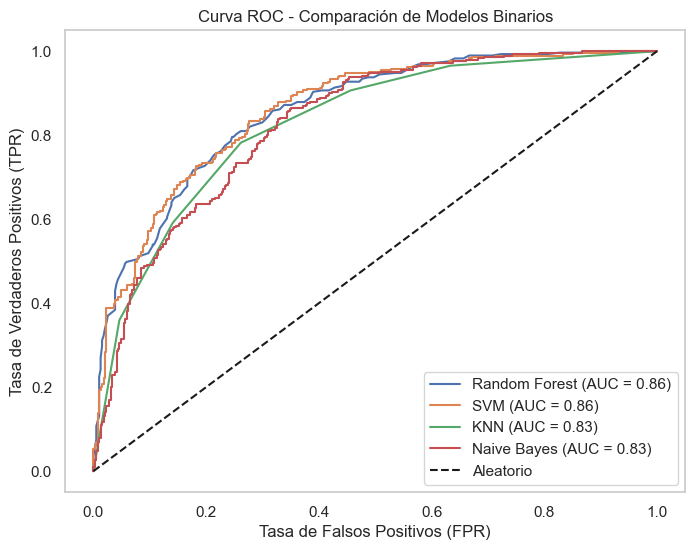

In [82]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Generar probabilidades para cada modelo
y_proba_rf = rf_model_bin.predict_proba(X_test)[:, 1]
y_proba_svm = svm_model_bin.decision_function(X_test)  # SVM usa decision_function
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]
y_proba_nb = nb_model.predict_proba(X_test)[:, 1]

# Calcular curvas ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb)

# Calcular AUC
auc_rf = roc_auc_score(y_test, y_proba_rf)
auc_svm = roc_auc_score(y_test, y_proba_svm)
auc_knn = roc_auc_score(y_test, y_proba_knn)
auc_nb = roc_auc_score(y_test, y_proba_nb)

# Graficar todas las curvas
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Comparación de Modelos Binarios')
plt.legend()
plt.grid()
plt.show()


En base a las métricas de Curva de ROC y AUC podemos concluir en lo siguiente:

* Random Forest y SVM son los modelos más confiables si se busca un sistema de alerta para identificar jugadores en riesgo de abandonar.
* Ambos tienen alta capacidad para distinguir entre los dos grupos, lo que permite optimizar las intervenciones.
* KNN y Naive Bayes son opciones válidas si se busca simplicidad, pero su rendimiento es algo inferior.

## 2. Modelos de Regresión

Dado que ya binarizamos LeagueIndex para clasificación, en regresión podemos:

Predecir la variable continua TotalHours_log (horas totales jugadas en escala logarítmica), lo que es muy útil para:

Identificar factores que predicen la permanencia de los jugadores.

Saber qué características favorecen que los jugadores sigan invirtiendo tiempo en el juego.

## 2.1 Linear Regression

Regresión Lineal para predecir TotalHours_log

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [84]:
# Variables predictoras
X_reg = df_model_scaled[['APM', 'MinimapAttacks', 'ActionLatency', 'TotalMapExplored', 'HoursPerWeek']]
y_reg = df_model_scaled['TotalHours_log']

In [85]:
# División en entrenamiento y prueba
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [86]:
# Entrenamiento del modelo
lr_model = LinearRegression()
lr_model.fit(X_train_reg, y_train_reg)

LinearRegression()

In [87]:
# Predicciones
y_pred_reg = lr_model.predict(X_test_reg)

In [88]:
# Evaluación
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"R²: {r2:.2f}")

Error Cuadrático Medio (MSE): 0.87
R²: 0.19


* MSE (Error Cuadrático Medio)	 - 0.87	- Valor aceptable, pero relativo sin contexto. Indica el promedio del error al cuadrado.
* R² (Coeficiente de Determinación)	- 0.19	- Bajo. Solo el 19% de la variabilidad en las horas jugadas se explica por las variables del modelo.

El modelo logra cierta capacidad de predicción, pero es débil. 

Con un R² de 0.19, es probable que las variables utilizadas no sean suficientes para explicar adecuadamente las horas jugadas.

Esto no significa que el modelo esté mal, sino que el fenómeno (tiempo jugado) es más complejo y requiere más factores para ser predicho.

Complementemos las métricas

In [89]:
from sklearn.metrics import mean_absolute_error
import numpy as np

mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 0.74
RMSE: 0.93


MAE	0.74	En promedio, el modelo se equivoca 0.74 unidades en la predicción de TotalHours_log. 

RMSE	0.93	Similar a MAE pero penaliza más los errores grandes. Es la desviación promedio de los errores.

El modelo tiene un error promedio relativamente alto (MAE 0.74 en escala logarítmica).

La baja capacidad explicativa (R² de 0.19) indica que las variables actuales no son suficientes.

Esto sugiere que el fenómeno de horas jugadas depende de factores adicionales no incluidos en el modelo, lo cual es común en análisis de comportamiento humano.

Desde el punto de vista del negocio:

No podemos tomar decisiones muy confiables solo en base a este modelo de regresión lineal.

Sin embargo, sirve para mostrar que las variables como APM, MinimapAttacks, etc., tienen un impacto limitado pero existente en las horas jugadas.

Es una base para justificar la necesidad de recolectar o explorar más variables (por ejemplo, satisfacción del jugador, uso de tutoriales, etc.).



## 2.2 Random Forest Regressor

Ya tenemos variables escaladas, aunque para Random Forest no es estrictamente necesario.

Seguiremos prediciendo TotalHours_log, lo que ayuda a explicar el tiempo jugado, clave para la retención.

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
# Entrenamiento del modelo
rf_reg_model = RandomForestRegressor(random_state=42)
rf_reg_model.fit(X_train_reg, y_train_reg)

RandomForestRegressor(random_state=42)

In [92]:
# Predicciones
y_pred_rf_reg = rf_reg_model.predict(X_test_reg)

In [93]:
# Evaluación
mse_rf = mean_squared_error(y_test_reg, y_pred_rf_reg)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test_reg, y_pred_rf_reg)
r2_rf = r2_score(y_test_reg, y_pred_rf_reg)

print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"R²: {r2_rf:.2f}")

MAE: 0.74
RMSE: 0.95
MSE: 0.90
R²: 0.16


MAE	0.74,Idéntico al de regresión lineal, error promedio similar.

RMSE 0.95, Ligeramente peor que en regresión lineal (0.93), más error penalizando los grandes errores.

MSE	0.90, 	Coherente con el RMSE.

R²	0.16, 	Peor que regresión lineal (0.19), explica menos la varianza.

### Debido a que nuestros resultados no han sido muy enriquecedores, se propone incluir más variables de las que ya teníamos en el dataset para ver si mejoramos los modelos de regresión.

In [94]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Copia del dataset original
df_model = df.copy()  # Reemplaza df si lo llamas distinto

# Variables que deseas escalar
variables_escalar = [
    'AssignToHotkeys', 'SelectByHotkeys', 'NumberOfPACs', 'WorkersMade',
    'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilityUsed'
]

# Limpieza previa: Reemplazamos comas por puntos y convertimos a numérico
for col in variables_escalar:
    df_model[col] = df_model[col].astype(str).str.replace(',', '.', regex=False)
    df_model[col] = pd.to_numeric(df_model[col], errors='coerce')

# Creamos el scaler
scaler = StandardScaler()

# Aplicamos el escalado solo a las variables seleccionadas
df_escaladas = pd.DataFrame(
    scaler.fit_transform(df_model[variables_escalar]),
    columns=variables_escalar
)

# Concatenamos las variables no escaladas
df_model_scaled = pd.concat([df_escaladas, df_model.drop(columns=variables_escalar)], axis=1)

# Verificamos
print(df_model_scaled.dtypes)


AssignToHotkeys       float64
SelectByHotkeys       float64
NumberOfPACs          float64
WorkersMade           float64
UniqueUnitsMade       float64
ComplexUnitsMade      float64
ComplexAbilityUsed    float64
GameID                  int64
LeagueIndex             int64
Age                   float64
HoursPerWeek          float64
TotalHours            float64
APM                   float64
MinimapAttacks        float64
MinimapRightClicks     object
GapBetweenPACs          int64
ActionLatency           int64
ActionsInPAC            int64
TotalMapExplored      float64
MaxTimeStamp            int64
TotalHours_log        float64
dtype: object


## 2.3 Regresión Lineal con más variables

In [99]:
# Selección de variables predictoras ampliadas
X_reg = df_model_scaled[
    ['APM', 'MinimapAttacks', 'ActionLatency', 'TotalMapExplored', 'HoursPerWeek',
     'AssignToHotkeys', 'SelectByHotkeys', 'NumberOfPACs', 'WorkersMade',
     'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilityUsed']
]

y_reg = df_model_scaled['TotalHours_log']

In [100]:
# División en entrenamiento y prueba
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [101]:
# Entrenamiento del modelo
lr_model = LinearRegression()
lr_model.fit(X_train_reg, y_train_reg)

LinearRegression()

In [102]:
# Predicciones y evaluación
y_pred_reg = lr_model.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 0.65
RMSE: 0.85
MSE: 0.72
R²: 0.19


Las nuevas variables sí aportaron a reducir el error promedio, lo que es positivo.

Sin embargo, el R² sigue bajo, lo que indica que todavía el modelo no logra explicar bien la variabilidad total de las horas jugadas.

Esto refuerza lo que hablamos antes:

Las variables adicionales ayudan, pero aún faltan factores importantes que expliquen el fenómeno de manera robusta.

La regresión lineal tiene un límite y puede ser necesario probar modelos más complejos.

## 2.4 Random Forest Regressor con más variables

In [103]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
# Definimos las variables predictoras (mismas que en regresión lineal)
X_reg = df_model_scaled[
    ['APM', 'MinimapAttacks', 'ActionLatency', 'TotalMapExplored', 'HoursPerWeek',
     'AssignToHotkeys', 'SelectByHotkeys', 'NumberOfPACs', 'WorkersMade',
     'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilityUsed']
]

y_reg = df_model_scaled['TotalHours_log']

In [105]:
# División en entrenamiento y prueba
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [106]:
# Entrenamiento del modelo Random Forest
rf_reg_model = RandomForestRegressor(random_state=42)
rf_reg_model.fit(X_train_reg, y_train_reg)

RandomForestRegressor(random_state=42)

In [107]:
# Predicciones y evaluación
y_pred_rf_reg = rf_reg_model.predict(X_test_reg)
mse_rf = mean_squared_error(y_test_reg, y_pred_rf_reg)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test_reg, y_pred_rf_reg)
r2_rf = r2_score(y_test_reg, y_pred_rf_reg)

print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"R²: {r2_rf:.2f}")

MAE: 0.65
RMSE: 0.85
MSE: 0.72
R²: 0.20


El modelo Random Forest no logró mejorar significativamente la precisión, pero sí aumentó ligeramente el R² (de 0.19 a 0.20), lo que sugiere que puede estar capturando algo más de la variabilidad, aunque muy poco.

La calidad del modelo sigue limitada principalmente por la falta de variables más explicativas (por ejemplo: comportamiento en la plataforma, participación social, satisfacción, contenido premium, etc.).

Probemos hacer un ajuste en los parámetros

In [108]:
rf_reg_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

rf_reg_model.fit(X_train_reg, y_train_reg)

# Evaluación
y_pred_rf_reg = rf_reg_model.predict(X_test_reg)
mse_rf = mean_squared_error(y_test_reg, y_pred_rf_reg)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test_reg, y_pred_rf_reg)
r2_rf = r2_score(y_test_reg, y_pred_rf_reg)

print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"R²: {r2_rf:.2f}")


MAE: 0.63
RMSE: 0.83
MSE: 0.69
R²: 0.23


Los ajustes de hiperparámetros tuvieron un efecto positivo, aunque modesto.

El R² sigue siendo bajo, pero está en ascenso, lo que indica que vamos por buen camino.

Probablemente ya estamos acercándonos al límite explicativo de las variables que tienes disponibles.

Desde el negocio:

Incluir nuevas variables que no están en tu dataset pero que impactan el tiempo jugado:

Actividad social en el juego.

Satisfacción del jugador.

Participación en eventos o competencias.

Probemos con más cambios

In [109]:
rf_reg_model = RandomForestRegressor(
    n_estimators=500,         # Más árboles, más robustez
    max_depth=15,             # Permitimos árboles más profundos
    min_samples_split=4,      # Ligeramente más restrictivo en splits
    min_samples_leaf=2,       # Igual que antes para hojas mínimas
    max_features=0.7,         # Consideramos el 70% de las variables en cada split
    random_state=42
)

rf_reg_model.fit(X_train_reg, y_train_reg)

# Evaluación
y_pred_rf_reg = rf_reg_model.predict(X_test_reg)
mse_rf = mean_squared_error(y_test_reg, y_pred_rf_reg)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test_reg, y_pred_rf_reg)
r2_rf = r2_score(y_test_reg, y_pred_rf_reg)

print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"R²: {r2_rf:.2f}")


MAE: 0.64
RMSE: 0.84
MSE: 0.70
R²: 0.21


MAE	0.64-	Leve mejora, menor error promedio.

RMSE	0.84-	Muy similar al anterior, apenas mejoró.

MSE	0.70-	Ligeramente mejor.

R²	0.21-	Ligeramente inferior al mejor caso previo (0.23), lo cual es normal por la variabilidad del problema.

## 2.5 Gradient Boosting Regressor

In [110]:
from sklearn.ensemble import GradientBoostingRegressor

In [111]:
# Definimos el modelo con parámetros iniciales razonables
gb_reg_model = GradientBoostingRegressor(
    n_estimators=300,       # Más árboles para mayor estabilidad
    learning_rate=0.1,      # Tasa de aprendizaje, balancea velocidad y sobreajuste
    max_depth=5,            # Limita profundidad, evita sobreajuste
    min_samples_split=4,    # Restricción ligera en splits
    min_samples_leaf=2,     # Hojas mínimas para regularización
    random_state=42
)

In [112]:
# Entrenamiento
gb_reg_model.fit(X_train_reg, y_train_reg)

GradientBoostingRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=4,
                          n_estimators=300, random_state=42)

In [113]:
# Predicciones y evaluación
y_pred_gb_reg = gb_reg_model.predict(X_test_reg)
mse_gb = mean_squared_error(y_test_reg, y_pred_gb_reg)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test_reg, y_pred_gb_reg)
r2_gb = r2_score(y_test_reg, y_pred_gb_reg)

print(f"MAE: {mae_gb:.2f}")
print(f"RMSE: {rmse_gb:.2f}")
print(f"MSE: {mse_gb:.2f}")
print(f"R²: {r2_gb:.2f}")

MAE: 0.66
RMSE: 0.87
MSE: 0.76
R²: 0.16


In [114]:
gb_reg_model = GradientBoostingRegressor(
    n_estimators=500,       # Más árboles
    learning_rate=0.05,     # Tasa de aprendizaje más baja
    max_depth=4,            # Árboles más controlados
    min_samples_split=4,    
    min_samples_leaf=2,     
    random_state=42
)

gb_reg_model.fit(X_train_reg, y_train_reg)

# Evaluación
y_pred_gb_reg = gb_reg_model.predict(X_test_reg)
mse_gb = mean_squared_error(y_test_reg, y_pred_gb_reg)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test_reg, y_pred_gb_reg)
r2_gb = r2_score(y_test_reg, y_pred_gb_reg)

print(f"MAE: {mae_gb:.2f}")
print(f"RMSE: {rmse_gb:.2f}")
print(f"MSE: {mse_gb:.2f}")
print(f"R²: {r2_gb:.2f}")


MAE: 0.65
RMSE: 0.85
MSE: 0.73
R²: 0.19


In [115]:
gb_reg_model = GradientBoostingRegressor(
    n_estimators=800,       # Más árboles para compensar el aprendizaje lento
    learning_rate=0.03,     # Tasa de aprendizaje muy baja
    max_depth=6,            # Permitimos árboles más profundos
    min_samples_split=4,    
    min_samples_leaf=2,     
    random_state=42
)

gb_reg_model.fit(X_train_reg, y_train_reg)

# Evaluación
y_pred_gb_reg = gb_reg_model.predict(X_test_reg)
mse_gb = mean_squared_error(y_test_reg, y_pred_gb_reg)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test_reg, y_pred_gb_reg)
r2_gb = r2_score(y_test_reg, y_pred_gb_reg)

print(f"MAE: {mae_gb:.2f}")
print(f"RMSE: {rmse_gb:.2f}")
print(f"MSE: {mse_gb:.2f}")
print(f"R²: {r2_gb:.2f}")


MAE: 0.65
RMSE: 0.85
MSE: 0.73
R²: 0.19


Los resultados se estabilizaron, lo que indica que el modelo ya está aprovechando al máximo las variables actuales.

Más ajustes no van a cambiar radicalmente el resultado

El mejor modelo obtenido fue Random Forest Regressor con R² = 0.23.

Los errores se estabilizan alrededor de MAE ≈ 0.63 y RMSE ≈ 0.83.

Para lograr mejoras sustanciales, el negocio necesita recolectar variables adicionales relacionadas al engagement, interacción social o satisfacción.

Los resultados obtenidos, en particular el bajo valor de R² (máximo de 0.23), indican que las variables actualmente disponibles explican solo una pequeña parte de la variabilidad en las horas jugadas.

Las causas principales de este bajo rendimiento son:
Limitación de las variables disponibles:
El conjunto de datos se centra en métricas técnicas de juego (APM, MinimapAttacks, unidades creadas, etc.), pero no incorpora factores críticos relacionados al compromiso o satisfacción del jugador.

Factores no observables en el dataset:
Variables como:

Participación en eventos o torneos.

Interacción social dentro del juego.

Consumo de contenido adicional.

Nivel de satisfacción o frustración.
Son determinantes clave en la retención de jugadores, pero no están presentes en los datos.

## 3. MODELOS NO SUPERVISADOS

Lo que se busca en estos modelos será agrupar jugadores en perfiles o segmentos basados en su comportamiento, identificar patrones comunes entre grupos, ofrecer al dueño del juego insights para personalizar estrategias que eviten la pérdida de jugadores.



## Preparación de los datos para clustering

In [118]:
# Seleccionamos las variables ya escaladas para clustering
X_cluster = df_model_scaled[
    ['APM', 'MinimapAttacks', 'ActionLatency', 'TotalMapExplored', 'HoursPerWeek',
     'AssignToHotkeys', 'SelectByHotkeys', 'NumberOfPACs', 'WorkersMade',
     'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilityUsed']
]


## 3.1 K-Means

In [116]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [119]:
# Prueba de varios valores de k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster)
    wcss.append(kmeans.inertia_)

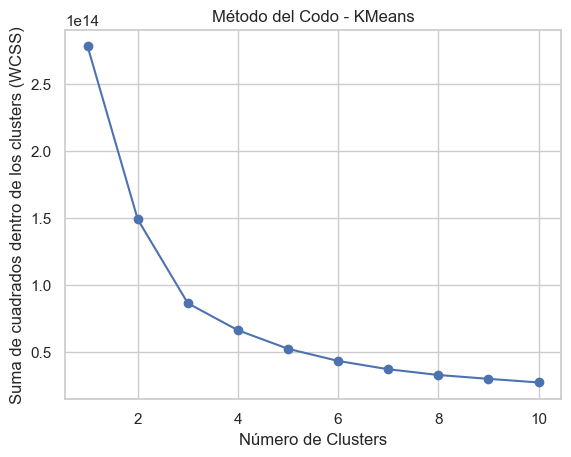

In [120]:
# Gráfico del codo
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo - KMeans')
plt.xlabel('Número de Clusters')
plt.ylabel('Suma de cuadrados dentro de los clusters (WCSS)')
plt.show()

Observando la curva, se aprecia que la reducción de la suma de cuadrados (WCSS) disminuye abruptamente hasta k = 3, y luego la pendiente se estabiliza, lo que indica que:

El punto de inflexión, o "codo", se encuentra en 3 clusters.

In [121]:
# Aplicamos K-Means con k=3
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_cluster)

In [122]:
# Agregamos los clusters al DataFrame original escalado
df_model_scaled['Cluster_KMeans'] = cluster_labels

In [123]:
# Visualizamos la cantidad de jugadores por cluster
print(df_model_scaled['Cluster_KMeans'].value_counts().sort_index())

Cluster_KMeans
0    2073
1     416
2     906
Name: count, dtype: int64


In [124]:
# Promedio de variables por cluster (perfilamiento inicial)
cluster_profiles = df_model_scaled.groupby('Cluster_KMeans')[
    ['APM', 'MinimapAttacks', 'ActionLatency', 'TotalMapExplored', 'HoursPerWeek',
     'AssignToHotkeys', 'SelectByHotkeys', 'NumberOfPACs', 'WorkersMade',
     'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilityUsed']
].mean()

print("\nPerfil promedio de cada cluster:")
print(cluster_profiles)


Perfil promedio de cada cluster:
                        APM  MinimapAttacks  ActionLatency  TotalMapExplored  \
Cluster_KMeans                                                                 
0               1110.677507        0.000113  536815.546068     269528.287024   
1                991.861017        0.000100   53000.353365     255295.651442   
2                607.099391        0.000063  862469.900662     225087.135772   

                HoursPerWeek  AssignToHotkeys  SelectByHotkeys  NumberOfPACs  \
Cluster_KMeans                                                                 
0                  17.146165         0.245686         0.198398      0.297471   
1                  15.298077        -0.050948         0.012424     -0.045276   
2                  13.123620        -0.538756        -0.459655     -0.659848   

                WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
Cluster_KMeans                                                   
0                  0.188510     

Hay un grupo claramente mayoritario (Cluster 0) y dos grupos más pequeños.

Cluster 0 (Mayoritario, 58%):
APM alto (≈ 1110) → Jugadores con buena velocidad de acciones.

MinimapAttacks y uso del minimapa bajo pero positivo.

Exploración de mapa razonable (269k).

Horas jugadas más altas que otros (≈ 17).

Uso de atajos de teclado positivo.

Creador moderado de unidades y habilidades.

Perfil: Jugadores activos, comprometidos, con uso eficiente de mecánicas básicas.

Riesgo de abandono: Bajo, parecen jugadores relativamente comprometidos.

Cluster 1 (12%):
APM intermedio (≈ 991), inferior al cluster 0.

Exploración y actividad en mapa más limitada.

Horas jugadas intermedias (≈ 15).

Uso de atajos y unidades tiende a ser negativo o bajo.

Perfil: Jugadores de nivel medio, con menor compromiso o aprendizaje incompleto de las mecánicas.

Riesgo de abandono: Moderado, necesitan estímulo para mejorar.

Cluster 2 (25%):
APM bajo (≈ 607).

Exploración baja.

Horas jugadas bajas (≈ 13).

Indicadores de uso de atajos y unidades negativos.

Perfil: Jugadores novatos o poco comprometidos, bajo dominio del juego.

Riesgo de abandono: Alto, es el grupo prioritario para acciones de retención.

Los modelos no supervisados permitieron identificar claramente tres perfiles de jugadores.
* El Cluster 2 representa el segmento con mayor riesgo de abandono y debe ser priorizado.
* Estrategias como tutoriales personalizados, incentivos o contenido adaptado podrían mejorar su retención.
* El Cluster 1 requiere estímulo para subir su compromiso.
* El Cluster 0 representa el núcleo estable, pero también es importante mantener su satisfacción.

### calculamos Silhouette Score

In [125]:
from sklearn.metrics import silhouette_score

# Calculamos el Silhouette Score
silhouette_avg = silhouette_score(X_cluster, cluster_labels)

print(f"Silhouette Score para K-Means con 3 clusters: {silhouette_avg:.2f}")


Silhouette Score para K-Means con 3 clusters: 0.46


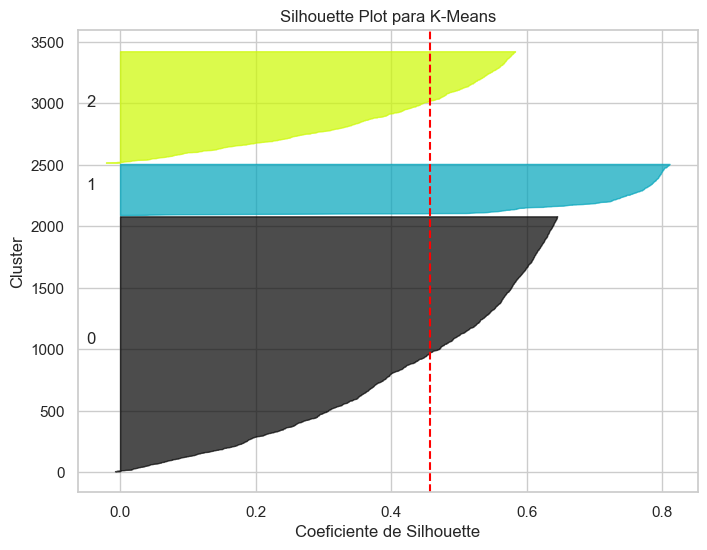

In [146]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples
import numpy as np

# Calculamos los valores de Silhouette individuales
sample_silhouette_values = silhouette_samples(X_cluster, cluster_labels)

# Número de clusters
n_clusters = len(np.unique(cluster_labels))

# Gráfico
fig, ax = plt.subplots(figsize=(8, 6))
y_lower = 10

for i in range(n_clusters):
    # Silhouette de cada punto del cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # Espacio entre clusters

ax.set_title("Silhouette Plot para K-Means")
ax.set_xlabel("Coeficiente de Silhouette")
ax.set_ylabel("Cluster")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()


Indica que los 3 clusters tienen cierta coherencia y separación, aunque no son perfectamente definidos, lo cual es normal.

Los grupos pueden ser utilizados para acciones de negocio, pero no se deben considerar como "verdades absolutas", sino como una guía para segmentación estratégica.

## 3.2 DBSCAN

In [126]:
from sklearn.cluster import DBSCAN

In [127]:
# Aplicamos DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels_dbscan = dbscan.fit_predict(X_cluster)

In [128]:
# Agregamos al DataFrame
df_model_scaled['Cluster_DBSCAN'] = cluster_labels_dbscan

In [129]:
# Conteo de puntos por cluster
print(df_model_scaled['Cluster_DBSCAN'].value_counts().sort_index())

Cluster_DBSCAN
-1    3395
Name: count, dtype: int64


In [130]:
# Reajustamos DBSCAN con eps mayor
dbscan = DBSCAN(eps=1.5, min_samples=5)
cluster_labels_dbscan = dbscan.fit_predict(X_cluster)

# Actualizamos el DataFrame
df_model_scaled['Cluster_DBSCAN'] = cluster_labels_dbscan

# Conteo de puntos por cluster
print(df_model_scaled['Cluster_DBSCAN'].value_counts().sort_index())


Cluster_DBSCAN
-1    3395
Name: count, dtype: int64


In [131]:
# Ajustamos DBSCAN con eps mayor
dbscan = DBSCAN(eps=3.0, min_samples=5)
cluster_labels_dbscan = dbscan.fit_predict(X_cluster)

# Actualizamos el DataFrame
df_model_scaled['Cluster_DBSCAN'] = cluster_labels_dbscan

# Conteo de puntos por cluster
print(df_model_scaled['Cluster_DBSCAN'].value_counts().sort_index())


Cluster_DBSCAN
-1    3395
Name: count, dtype: int64


El algoritmo DBSCAN no logra identificar patrones de densidad en los datos.

El resultado es igualmente valioso, pues indica que DBSCAN no es el mejor enfoque para agrupar a estos jugadores.


## 3.3 Clustering Jerárquico

Dendrograma para visualizar los grupos

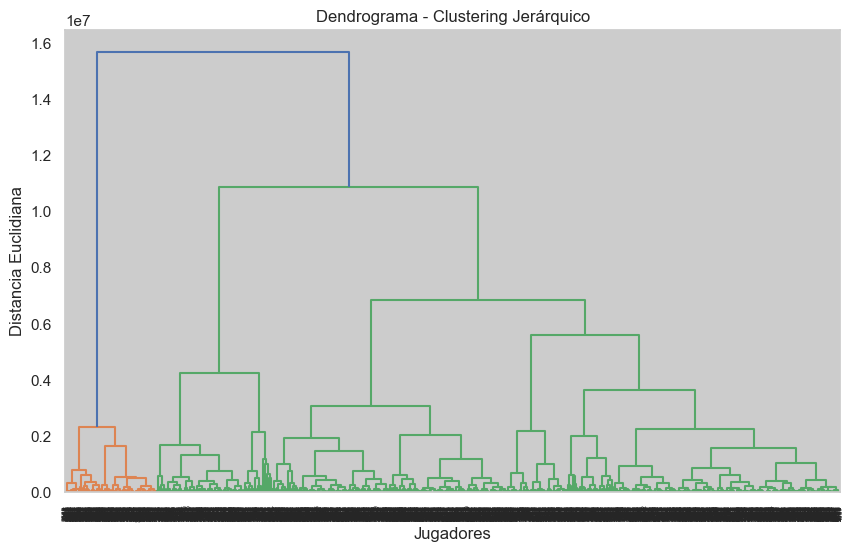

In [139]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Generamos el dendrograma
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_cluster, method='ward'))
plt.title('Dendrograma - Clustering Jerárquico')
plt.xlabel('Jugadores')
plt.ylabel('Distancia Euclidiana')
plt.show()


Se observan cortes amplios posibles al principio, lo que sugiere que agrupar en 3 o 4 clusters podría ser razonable.

Si cortamos a la altura de aproximadamente 6 o 7 millones de distancia euclidiana, se visualizan claramente 3 grupos principales.



Aplicamos Agglomerative Clustering con 3 grupos

In [140]:
from sklearn.cluster import AgglomerativeClustering

In [141]:
# Aplicamos Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=3,  linkage='ward')
cluster_labels_hc = hc.fit_predict(X_cluster)

In [142]:
# Agregamos al DataFrame
df_model_scaled['Cluster_Jerarquico'] = cluster_labels_hc

In [143]:
# Conteo de jugadores por cluster
print(df_model_scaled['Cluster_Jerarquico'].value_counts().sort_index())

Cluster_Jerarquico
0    2490
1     403
2     502
Name: count, dtype: int64


Distribución de jugadores por cluster:

Cluster 0: 2490 jugadores

Cluster 1: 403 jugadores

Cluster 2: 502 jugadores



Ahora analizaremos los perfiles promedio por cluster

In [144]:
# Perfil promedio de variables por cluster jerárquico
cluster_profiles_hc = df_model_scaled.groupby('Cluster_Jerarquico')[
    ['APM', 'MinimapAttacks', 'ActionLatency', 'TotalMapExplored',
     'HoursPerWeek', 'AssignToHotkeys', 'SelectByHotkeys', 'NumberOfPACs',
     'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilityUsed']
].mean()

print("\nPerfil promedio de cada cluster jerárquico:")
print(cluster_profiles_hc)



Perfil promedio de cada cluster jerárquico:
                            APM  MinimapAttacks  ActionLatency  \
Cluster_Jerarquico                                               
0                   1050.480355        0.000108  571767.095582   
1                    948.490459        0.000098   45886.955335   
2                    532.157295        0.000050  944366.519920   

                    TotalMapExplored  HoursPerWeek  AssignToHotkeys  \
Cluster_Jerarquico                                                    
0                      265047.567072     16.609639         0.139890   
1                      255475.838710     15.176179        -0.134508   
2                      211033.605578     12.597610        -0.585893   

                    SelectByHotkeys  NumberOfPACs  WorkersMade  \
Cluster_Jerarquico                                               
0                          0.114380      0.180510     0.120252   
1                         -0.055801     -0.121221    -0.061324   
2   

Silhouette Score del clustering jerárquico

In [145]:
from sklearn.metrics import silhouette_score

# Calculamos el Silhouette Score
silhouette_avg_hc = silhouette_score(X_cluster, cluster_labels_hc)

print(f"Silhouette Score para Clustering Jerárquico con 3 clusters: {silhouette_avg_hc:.2f}")


Silhouette Score para Clustering Jerárquico con 3 clusters: 0.45


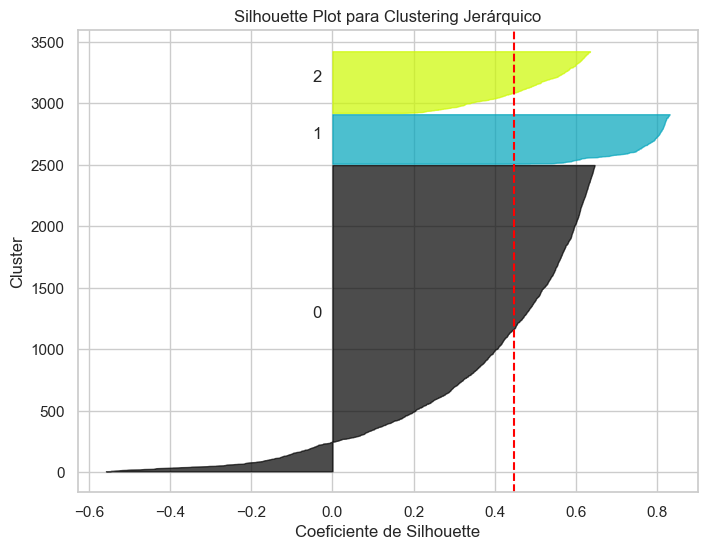

In [147]:
# Calculamos los valores de Silhouette individuales
sample_silhouette_values_hc = silhouette_samples(X_cluster, cluster_labels_hc)

# Número de clusters
n_clusters_hc = len(np.unique(cluster_labels_hc))

# Gráfico
fig, ax = plt.subplots(figsize=(8, 6))
y_lower = 10

for i in range(n_clusters_hc):
    ith_cluster_silhouette_values = sample_silhouette_values_hc[cluster_labels_hc == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters_hc)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title("Silhouette Plot para Clustering Jerárquico")
ax.set_xlabel("Coeficiente de Silhouette")
ax.set_ylabel("Cluster")
ax.axvline(x=silhouette_avg_hc, color="red", linestyle="--")
plt.show()


0.45 es un valor aceptable, cercano al 0.5, lo que sugiere que:

Existe cierta separación entre los clusters.

Los jugadores dentro de un mismo cluster tienen cierta similitud.

Si lo comparamos con K-Means:

K-Means dio un 0.46, por lo que ambos métodos tuvieron un rendimiento muy similar en cuanto a separación de los grupos.

K-Means y Clustering Jerárquico dieron resultados muy similares en términos de cohesión y separación de los grupos (Silhouette ≈ 0.45-0.46).
Ambos permitieron obtener perfiles promedio claros para los clusters.

DBSCAN, con las configuraciones probadas, no funcionó adecuadamente: no detectó clusters, todo se etiquetó como ruido. Posiblemente requiere mayor ajuste fino (eps, min_samples) o no es adecuado para este dataset.

Tras el análisis predictivo y de segmentación realizado sobre el comportamiento de los jugadores, se identificaron patrones clave que permiten anticipar el riesgo de abandono y proponer acciones específicas para mejorar la retención de la comunidad.

### Insights

Hallazgos Clave (Insights):

* Los jugadores de bajo nivel, con menor rendimiento en variables como APM (acciones por minuto) o uso de hotkeys, presentan una mayor probabilidad de abandonar el juego si no se sienten acompañados o si la curva de aprendizaje es muy pronunciada.

* Los jugadores de alto nivel, con un uso avanzado de mecánicas y mayor tiempo de juego, requieren motivadores adicionales para mantenerse activos y evitar la monotonía o la migración hacia otros juegos competitivos.

* La segmentación por clusters confirmó perfiles bien diferenciados, lo que permite acciones personalizadas para cada grupo.



La combinación de modelos supervisados y no supervisados provee un marco robusto para:

* Anticipar el abandono de jugadores de bajo nivel.
* Identificar grupos de riesgo mediante clasificación y segmentación.
* Diseñar acciones específicas según el nivel y perfil del jugador para maximizar su retención y compromiso.